In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
complex_df = pd.read_pickle('/home/ubuntu/complex_label.pkl')

In [3]:
complex_df.columns

Index(['GeneAB', 'Same_Complex'], dtype='object')

In [4]:
pw = pd.read_pickle('/home/ubuntu/allpairs_spearman_correlation.pkl')

In [5]:
import os
df=pd.DataFrame()
for f in os.listdir('/home/ubuntu/scgpt_split_outputs'):
    if f.startswith('scGPT'):
        
        name = f[:-20]
        print(f'Loading {name}...')
        data = pd.read_pickle('/home/ubuntu/scgpt_split_outputs/' + f)
        df[name] = data['Cosine_Similarity'].to_list()

Loading scGPT_bc_embeddings_similarities...
Loading scGPT_pancancer_embeddings_similarities...
Loading scGPT_CP_embeddings_similarities...
Loading scGPT_lung_embeddings_similarities...
Loading scGPT_heart_embeddings_similarities...
Loading scGPT_brain_embeddings_similarities...
Loading scGPT_kidney_embeddings_similarities...
Loading scGPT_human_embeddings_similarities...


In [6]:
for f in os.listdir('/home/ubuntu/gf_split_outputs'):
    if f.startswith('GF'):
        
        name = f[:-20]
        print(f'Loading {name}...')
        data = pd.read_pickle('/home/ubuntu/gf_split_outputs/' + f)
        df[name] = data['Cosine_Similarity'].to_list()

Loading GF-6L30M_HUMANemb_similarities...
Loading GF-20L95M_HUMANemb_similarities...
Loading GF-12L95M_HUMANemb_similarities...
Loading GF-12L95MCANCER_UNIPROT_HUMANemb_similarities...
Loading GF-12L30M_HUMANemb_similarities...


In [7]:
df['Correlation'] = pw['Correlation'].to_list()

In [8]:
df['Same_Complex'] = complex_df['Same_Complex'].to_list()

In [9]:
# df['Gene_A'] = gene_pairs['Gene_A'].to_list()
# df['Gene_B'] = gene_pairs['Gene_B'].to_list()

df['GeneAB'] = complex_df['GeneAB'].to_list()

In [10]:
df

,scGPT_bc_embeddings_similarities,scGPT_pancancer_embeddings_similarities,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_similarities,scGPT_heart_embeddings_similarities,scGPT_brain_embeddings_similarities,scGPT_kidney_embeddings_similarities,scGPT_human_embeddings_similarities,GF-6L30M_HUMANemb_similarities,GF-20L95M_HUMANemb_similarities,GF-12L95M_HUMANemb_similarities,GF-12L95MCANCER_UNIPROT_HUMANemb_similarities,GF-12L30M_HUMANemb_similarities,Correlation,Same_Complex,GeneAB
0,NaN,0.566069,0.356636,0.224554,0.117288,0.114432,0.149671,0.357125,NaN,NaN,NaN,NaN,NaN,0.395247,0,ST13P4_WASH2P
1,NaN,-0.083783,0.105390,0.051439,0.034904,0.051954,0.024855,0.106240,NaN,NaN,NaN,NaN,NaN,0.121127,0,ST13P4_FAM90A12P
2,NaN,0.336766,0.159616,0.118687,0.068871,0.069045,0.060269,0.160441,NaN,NaN,NaN,NaN,NaN,0.359050,0,ST13P4_PI4KAP1
3,NaN,0.258465,0.210777,0.104398,0.070150,0.016221,0.079906,0.211458,NaN,NaN,NaN,NaN,NaN,0.273463,0,ST13P4_SNX29P2
4,NaN,0.151502,0.099180,-0.046862,-0.016629,0.038130,-0.063625,0.100117,NaN,NaN,NaN,NaN,NaN,0.378892,0,ST13P4_ZNF818P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200794870,NaN,0.058843,-0.123608,0.025317,0.011302,0.020572,0.028625,-0.122569,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_PPT1
200794871,NaN,0.055566,0.068872,0.036179,-0.039677,-0.038647,-0.015523,0.069859,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_PLD2
200794872,NaN,0.012171,-0.037853,-0.023328,-0.022463,-0.078864,-0.025873,-0.037521,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_EIF4EBP1
200794873,NaN,0.020594,0.128618,0.060834,0.002627,-0.001737,0.032308,0.135589,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_TINAG


In [11]:
#df.to_pickle('full_dataset.pkl')

In [12]:
X_full = df.dropna()

In [13]:
X_full

,scGPT_bc_embeddings_similarities,scGPT_pancancer_embeddings_similarities,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_similarities,scGPT_heart_embeddings_similarities,scGPT_brain_embeddings_similarities,scGPT_kidney_embeddings_similarities,scGPT_human_embeddings_similarities,GF-6L30M_HUMANemb_similarities,GF-20L95M_HUMANemb_similarities,GF-12L95M_HUMANemb_similarities,GF-12L95MCANCER_UNIPROT_HUMANemb_similarities,GF-12L30M_HUMANemb_similarities,Correlation,Same_Complex,GeneAB
949027,0.063506,0.135321,0.234719,0.125535,0.135128,0.383622,0.079211,0.235762,0.549340,0.188242,0.876189,0.879979,0.841622,0.116782,0,PYDC1_PYCR3
949028,-0.056565,0.079216,0.161900,-0.021724,0.012198,0.222155,-0.051431,0.163293,0.393251,0.173845,0.779322,0.793168,0.762249,0.126619,0,PYDC1_BAG3
949029,0.116124,0.308463,0.226987,0.087753,0.112959,0.410780,0.055358,0.228007,0.585679,0.394791,0.899145,0.883349,0.825831,0.230485,0,PYDC1_PXT1
949030,0.016978,0.058653,-0.002022,-0.049605,-0.008472,0.003432,-0.041763,-0.000696,0.347202,0.097802,0.738388,0.803293,0.789023,0.220536,0,PYDC1_PXK
949031,-0.031810,0.006320,-0.130927,-0.091508,-0.121315,-0.185753,-0.089556,-0.130848,0.347644,0.157392,0.742027,0.780049,0.778803,0.246139,0,PYDC1_PUM2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200776377,-0.110339,0.086440,0.089373,0.034659,0.114352,0.038629,0.056565,0.094981,0.315341,0.108741,0.789531,0.840061,0.791421,0.154140,0,BCAT1_TMPRSS3
200776434,-0.034737,0.127792,0.063827,-0.004790,0.008433,0.048624,-0.031635,0.063980,0.364127,0.127619,0.752806,0.793549,0.798082,0.319412,0,BCAT1_TPP1
200776892,-0.001384,-0.010163,-0.005988,0.030453,0.046065,-0.061751,0.049211,-0.005287,0.405193,0.131710,0.824809,0.852520,0.815836,0.349904,0,BCAT1_ZNF20
200776899,-0.035554,-0.046015,0.062382,-0.033491,0.045953,0.009507,0.009540,0.062917,0.283855,0.194667,0.821454,0.861418,0.817727,0.339114,0,BCAT1_ZNF230


In [19]:
gene_filter = pd.read_csv("symmetric_gene_pairs_by_complex.csv")
gene_filter.rename(columns={'Gene_Pair':'GeneAB'}, inplace=True)

In [24]:
gene_filter[gene_filter['Complex']=='20S Proteasome']

,GeneAB,Complex
0,PSMA1_PSMA2,20S Proteasome
1,PSMA1_PSMA3,20S Proteasome
2,PSMA1_PSMA4,20S Proteasome
3,PSMA1_PSMA5,20S Proteasome
4,PSMA1_PSMA6,20S Proteasome
...,...,...
177,PSMB7_PSMB2,20S Proteasome
178,PSMB7_PSMB3,20S Proteasome
179,PSMB7_PSMB4,20S Proteasome
180,PSMB7_PSMB5,20S Proteasome


In [25]:
gene_filter['Complex'].value_counts()

IFT-B             240
20S Proteasome    182
IFT-A              30
Name: Complex, dtype: int64

In [29]:
gene_filter[gene_filter['Complex']=='IFT-B']

,GeneAB,Complex
212,TTC30A_HSPB11,IFT-B
213,TTC30A_IFT52,IFT-B
214,TTC30A_IFT74,IFT-B
215,TTC30A_IFT81,IFT-B
216,TTC30A_CCDC13,IFT-B
...,...,...
447,IFT88_IFT46,IFT-B
448,IFT88_IFT57,IFT-B
449,IFT88_IFT22,IFT-B
450,IFT88_TTC30B,IFT-B


In [26]:
psm20 = X_full.merge(gene_filter[gene_filter['Complex']=='20S Proteasome'], on = 'GeneAB')
IFTA = X_full.merge(gene_filter[gene_filter['Complex']=='IFT-A'], on = 'GeneAB')
IFTB = X_full.merge(gene_filter[gene_filter['Complex']=='IFT-B'], on = 'GeneAB')

In [30]:
import pandas as pd

def sample_with_labels(X_full, gene_filter, complex_name, seed=42):
    # Step 1: Get real complex data
    complex_genes = gene_filter[gene_filter['Complex'] == complex_name]
    real_df = X_full.merge(complex_genes, on='GeneAB')
    real_df = real_df.copy()
    real_df['label'] = 1

    # Step 2: Sample background (exclude real GeneABs to avoid overlap)
    n_samples = len(real_df)
    available_background = X_full[~X_full['GeneAB'].isin(real_df['GeneAB'])]
    random_df = available_background.sample(n=n_samples, random_state=seed)
    random_df = random_df.copy()
    random_df['label'] = 0

    # Step 3: Concatenate and return
    combined_df = pd.concat([real_df, random_df], ignore_index=True)
    combined_df['Complex'] = complex_name  # Optional: keep track of complex origin
    return combined_df

# Apply for each complex
psm20_labeled = sample_with_labels(X_full, gene_filter, '20S Proteasome')
IFTA_labeled = sample_with_labels(X_full, gene_filter, 'IFT-A')
IFTB_labeled = sample_with_labels(X_full, gene_filter, 'IFT-B')


In [44]:
psm20_labeled[psm20_labeled['Same_Complex']==0]['scGPT_human_embeddings_similarities'].mean()

0.0564816890509574

In [40]:
X_full['Correlation'].mean()

0.26759466172994606

In [42]:
X_full['scGPT_human_embeddings_similarities'].mean()

0.05858147426529394

In [84]:
# Re-import necessary packages after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_kernel_density(df, column, output, title = None, legend_title="Label", labels=["Background (0)", "Protein Complex (1)"]):
    """
    Plots high-resolution KDE for the specified column, grouped by 'label' (0 = background, 1 = complex).

    Parameters:
    - df (pd.DataFrame): DataFrame with 'label' column and target column to plot.
    - column (str): Column name to visualize.
    - output (str): Filename to save the PNG plot.
    """

    plt.style.use('seaborn-v0_8-whitegrid')

    if title != None:
        f"Kernel Density Plot: {column}"
    else:
        pass

    # Define Wes Anderson palette
    wes_palette = {
        0: "#3C6997",  # Blue
        1: "#F18F01"   # Orange
    }

    print('label = 0, random')
    print(df[df['label']==0][column].mean())
    print('label = 1, complex')
    print(df[df['label']==1][column].mean())

    # Define and enforce label order and meaning
    label_map = {0: "Background", 1: "Protein Complex"}
    df = df.copy()
    df["label"] = pd.Categorical(df["label"], categories=[0, 1], ordered=True)
    
    # Plot
    plt.figure(figsize=(10, 6), dpi=300)
    sns.kdeplot(
        data=df,
        x=column,
        hue="label",
        fill=False,
        linewidth=2
        # linewidth=2,
        # # palette={0: "blue", 1: "orange"},
        # palette=wes_palette
    )
    
    # Titles and labels
    plt.title("", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Density", fontsize=12)


    plt.legend().remove()
    # Fix legend
    # handles, labels = plt.gca().get_legend_handles_labels()
    # new_labels = [label_map[int(lbl)] for lbl in labels]
    # plt.legend(handles, new_labels, title="Group", fontsize=10, title_fontsize=11)
    
    
    plt.tight_layout()
    
    output_path = f"{output}"
    plt.savefig(output_path)
    
    plt.show()
    plt.close()
    # return output_path


label = 0, random
0.0564816890509574
label = 1, complex
0.3454915836944685


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


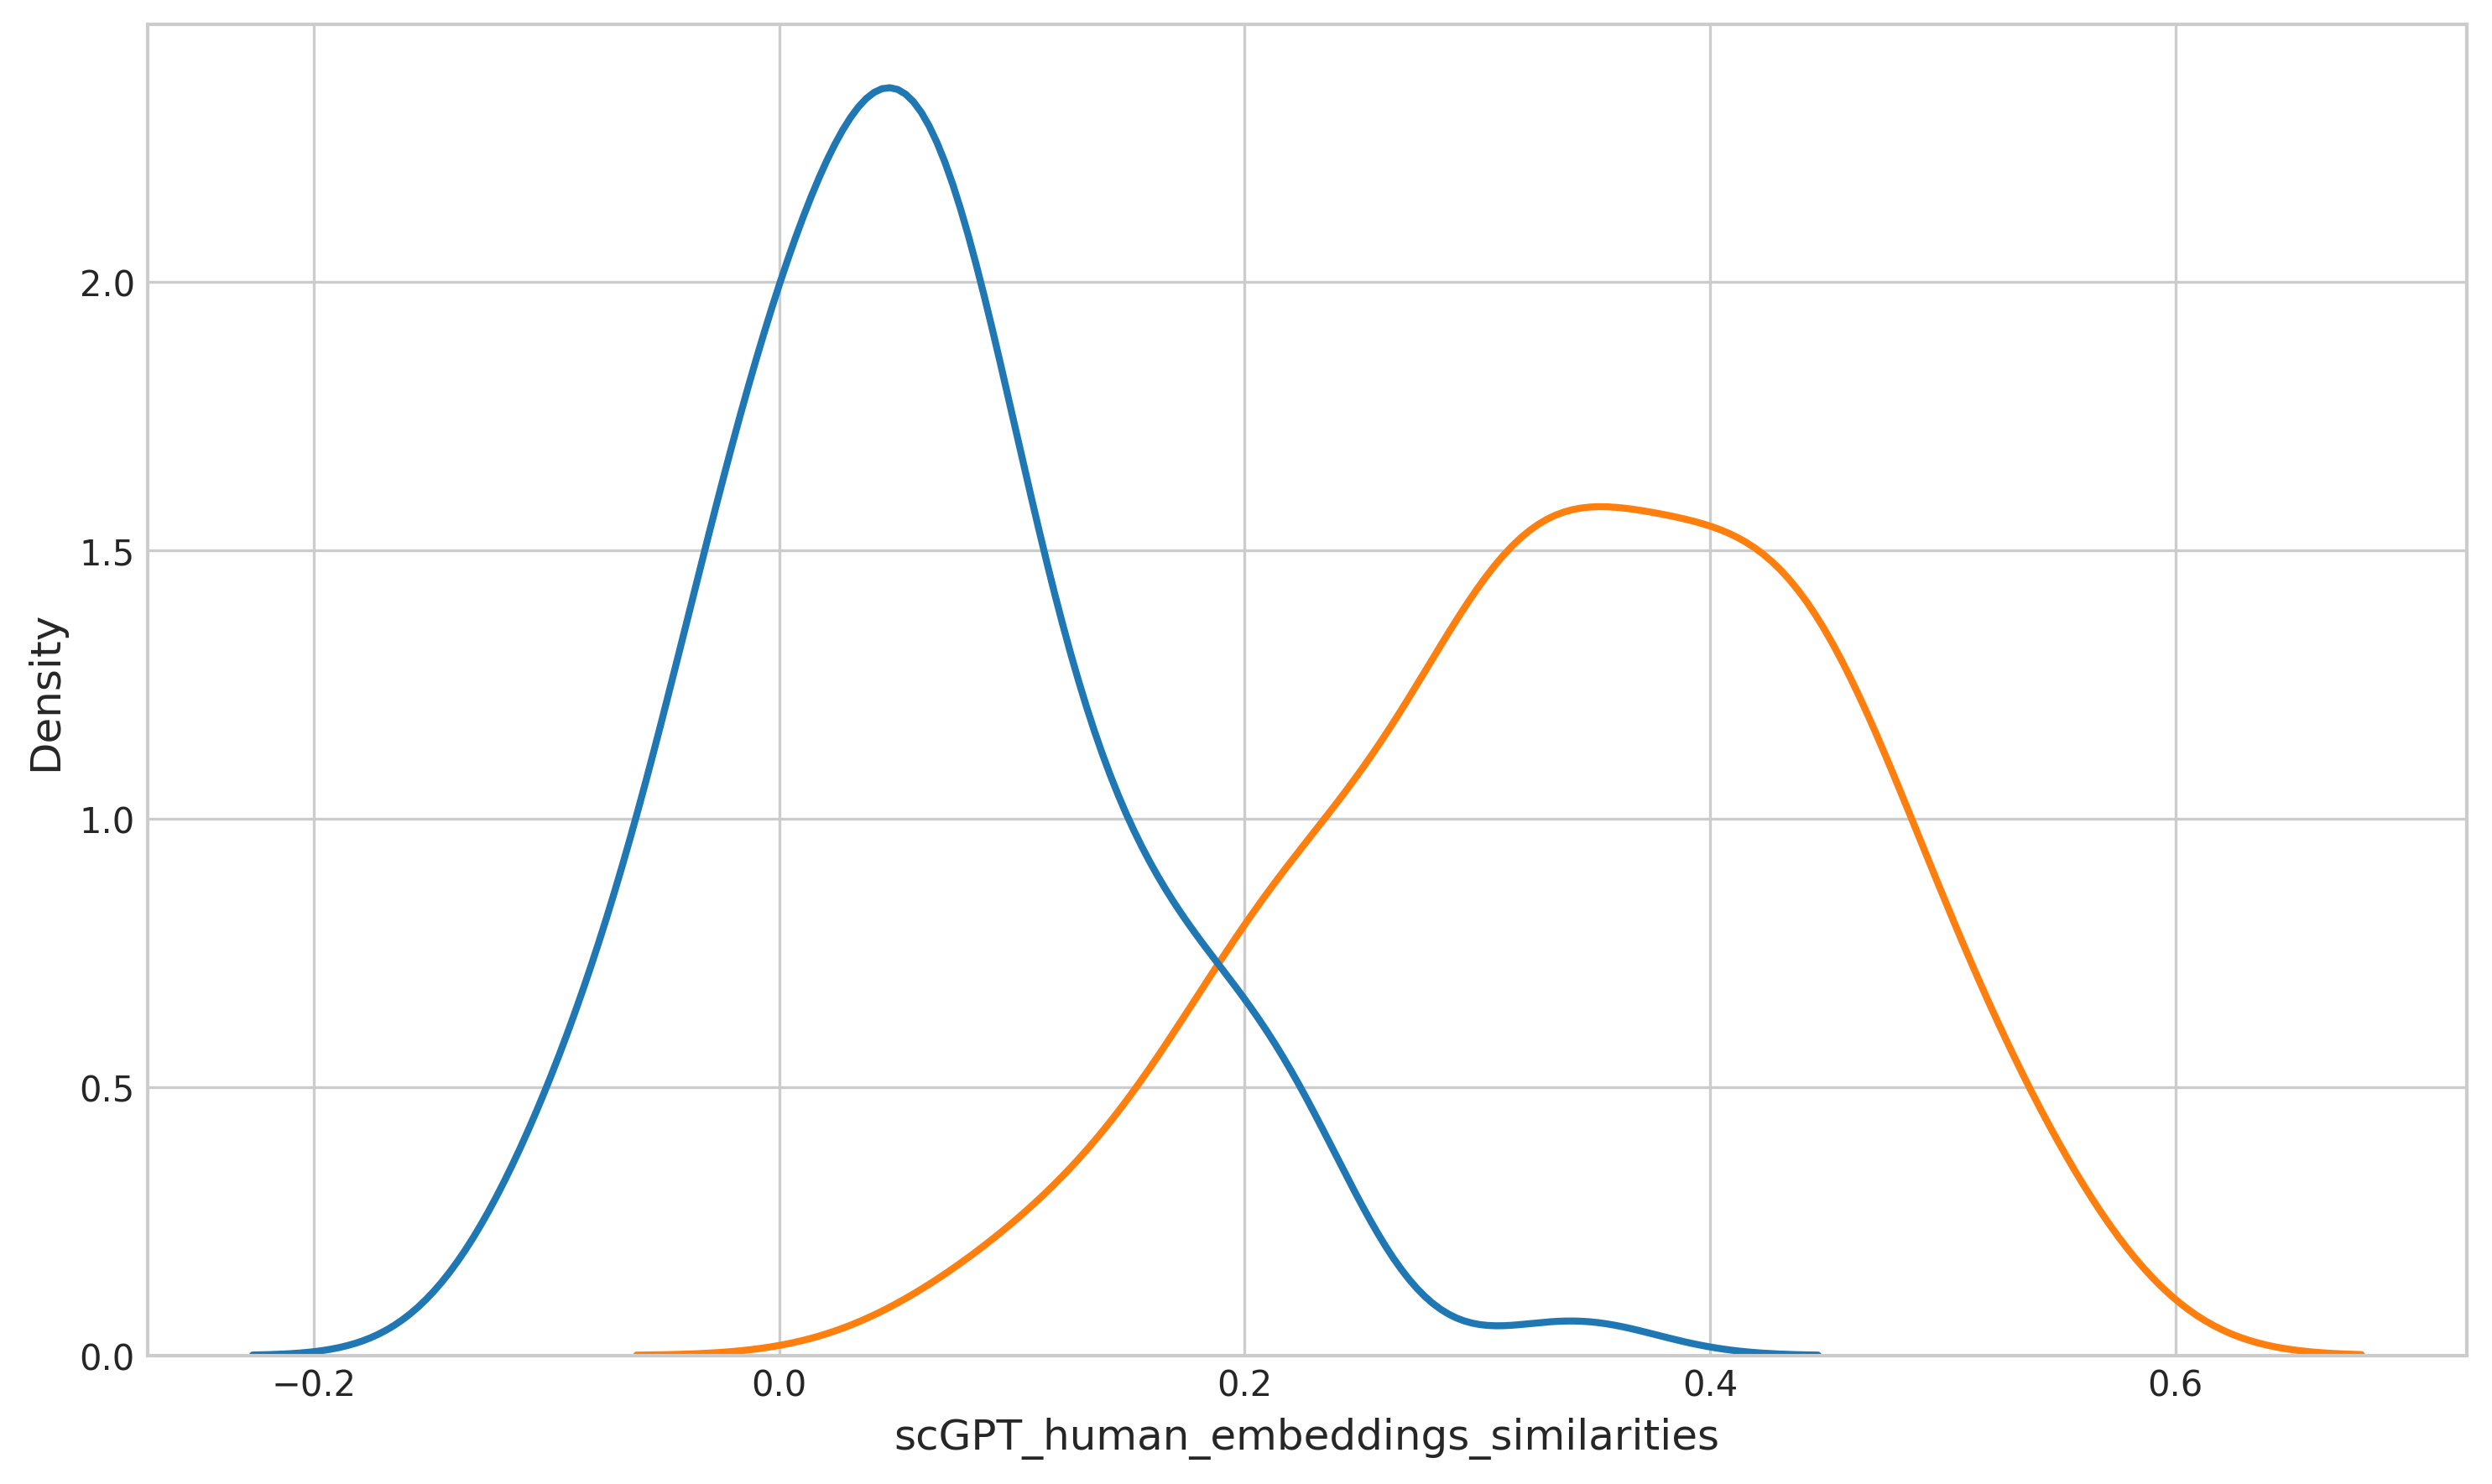

label = 0, random
0.18083676734714063
label = 1, complex
0.12589360489049456


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


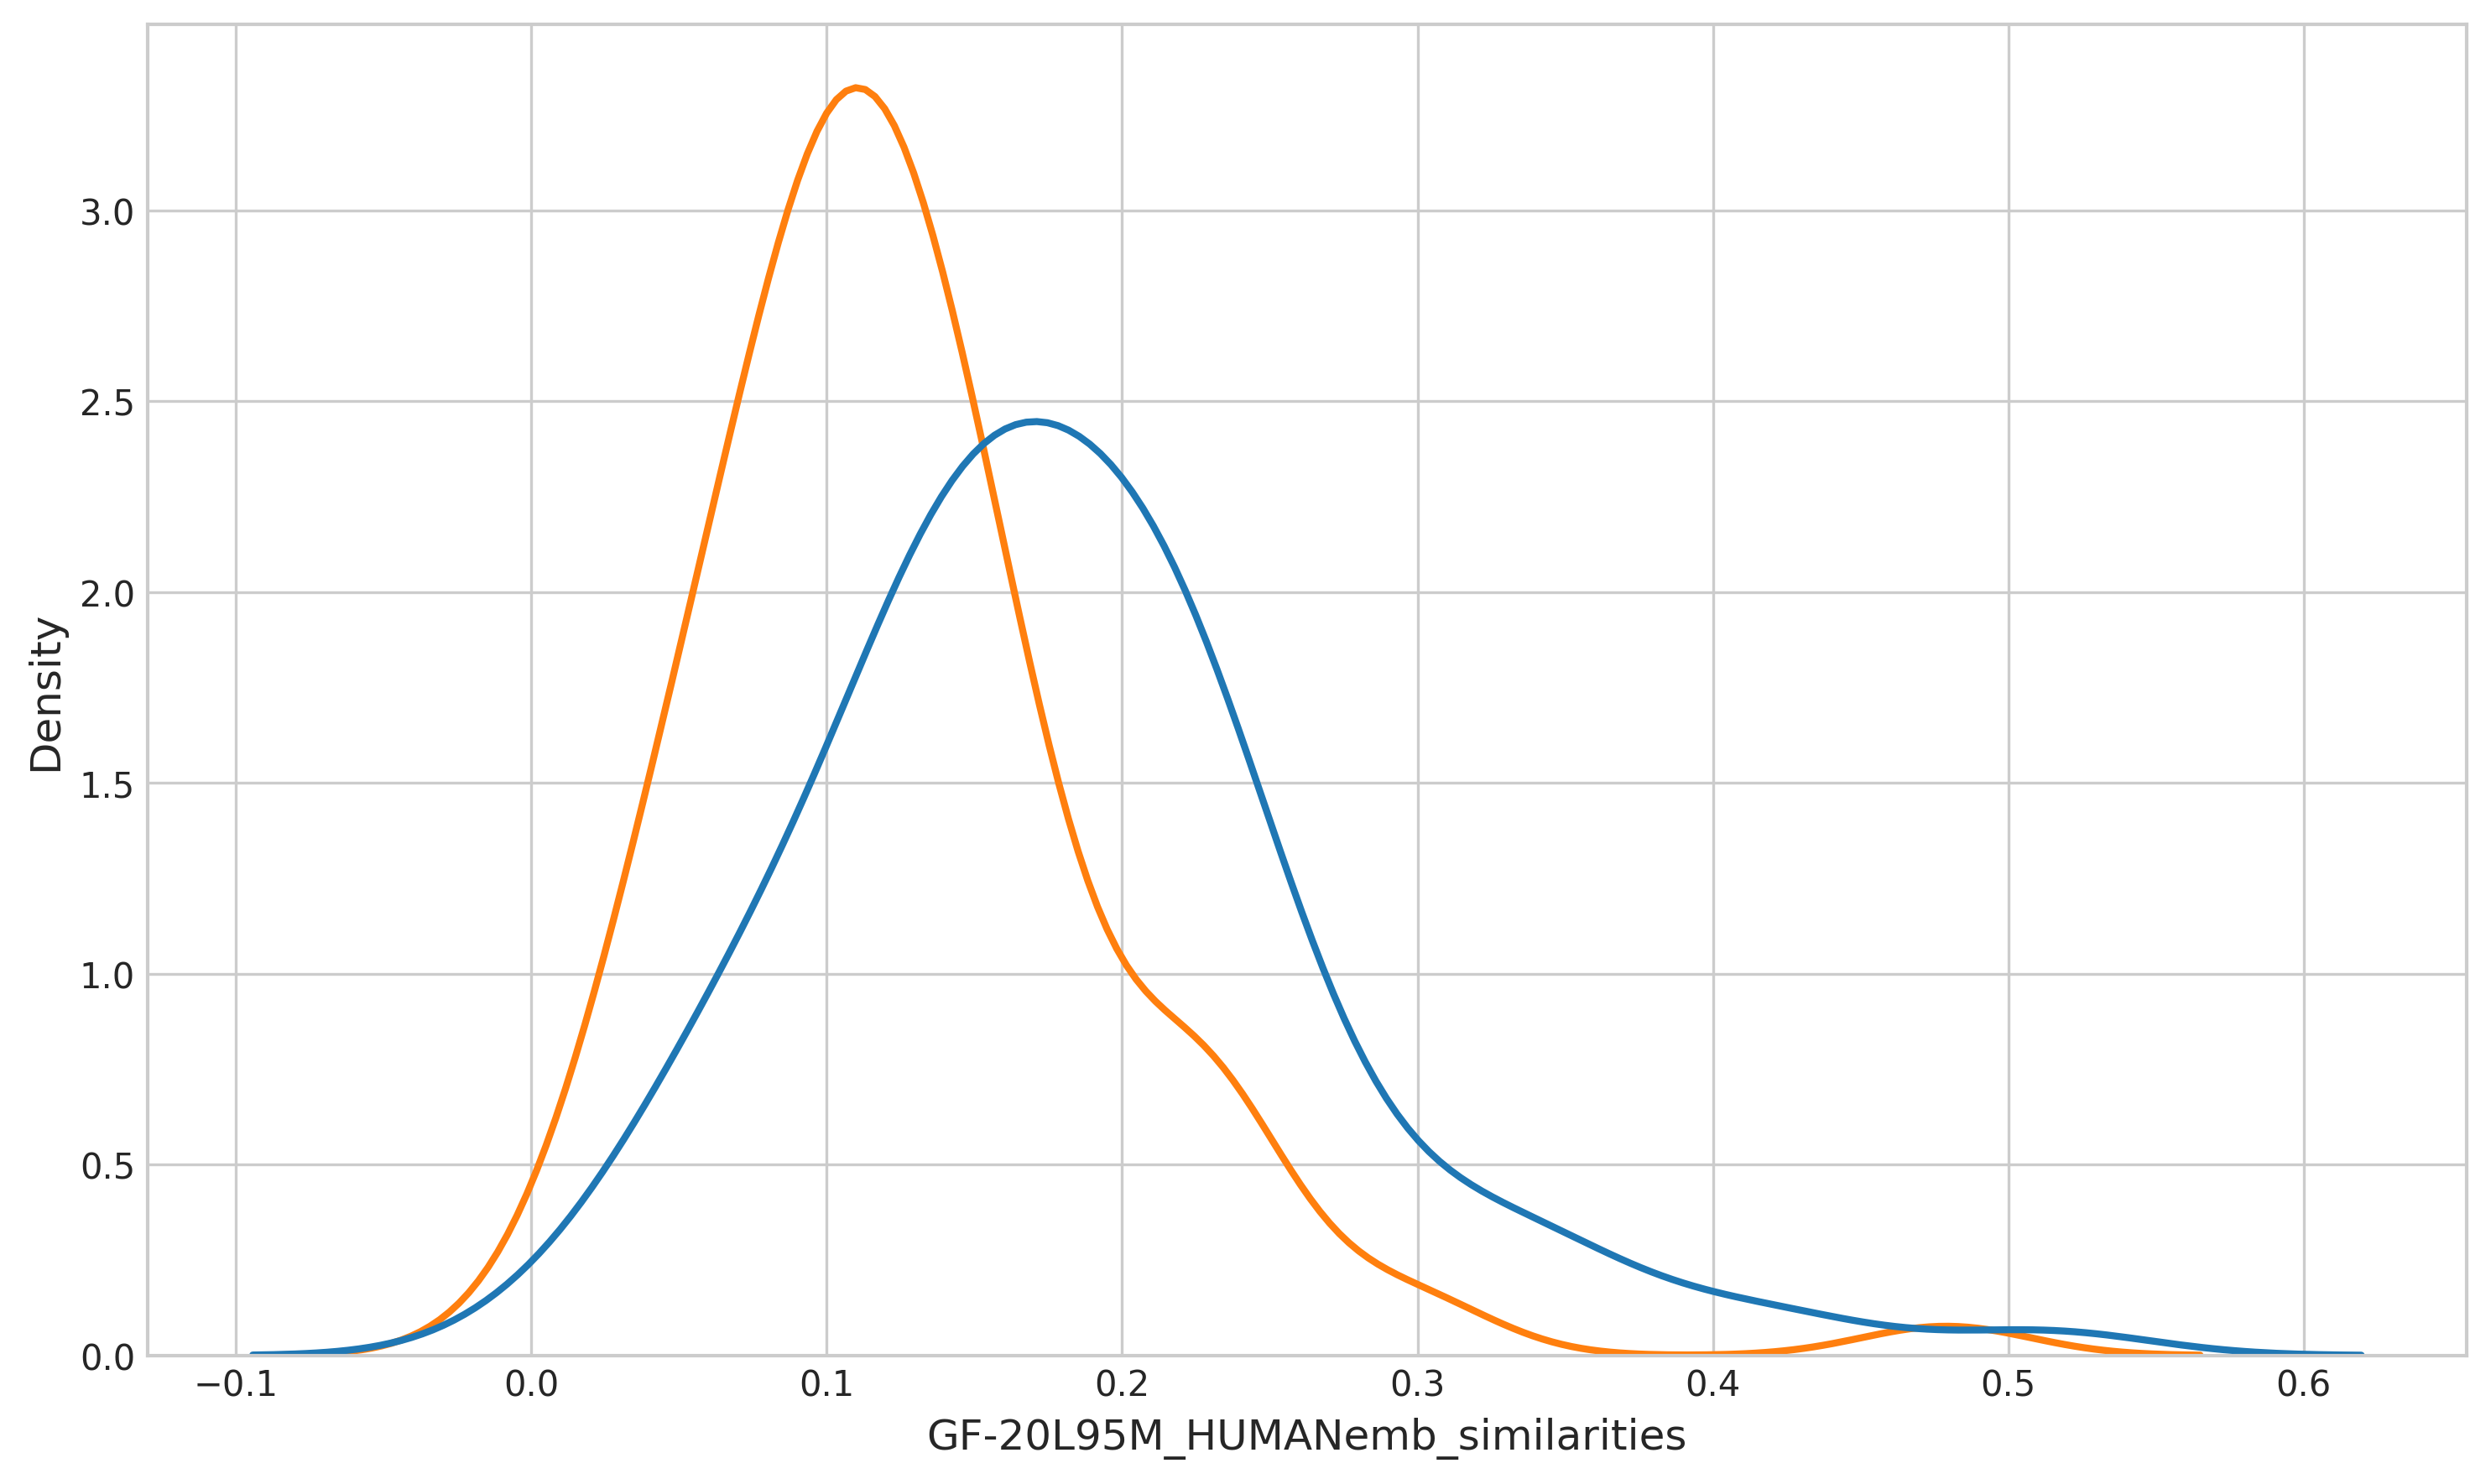

label = 0, random
0.22238973278508137
label = 1, complex
0.24726198430404894


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


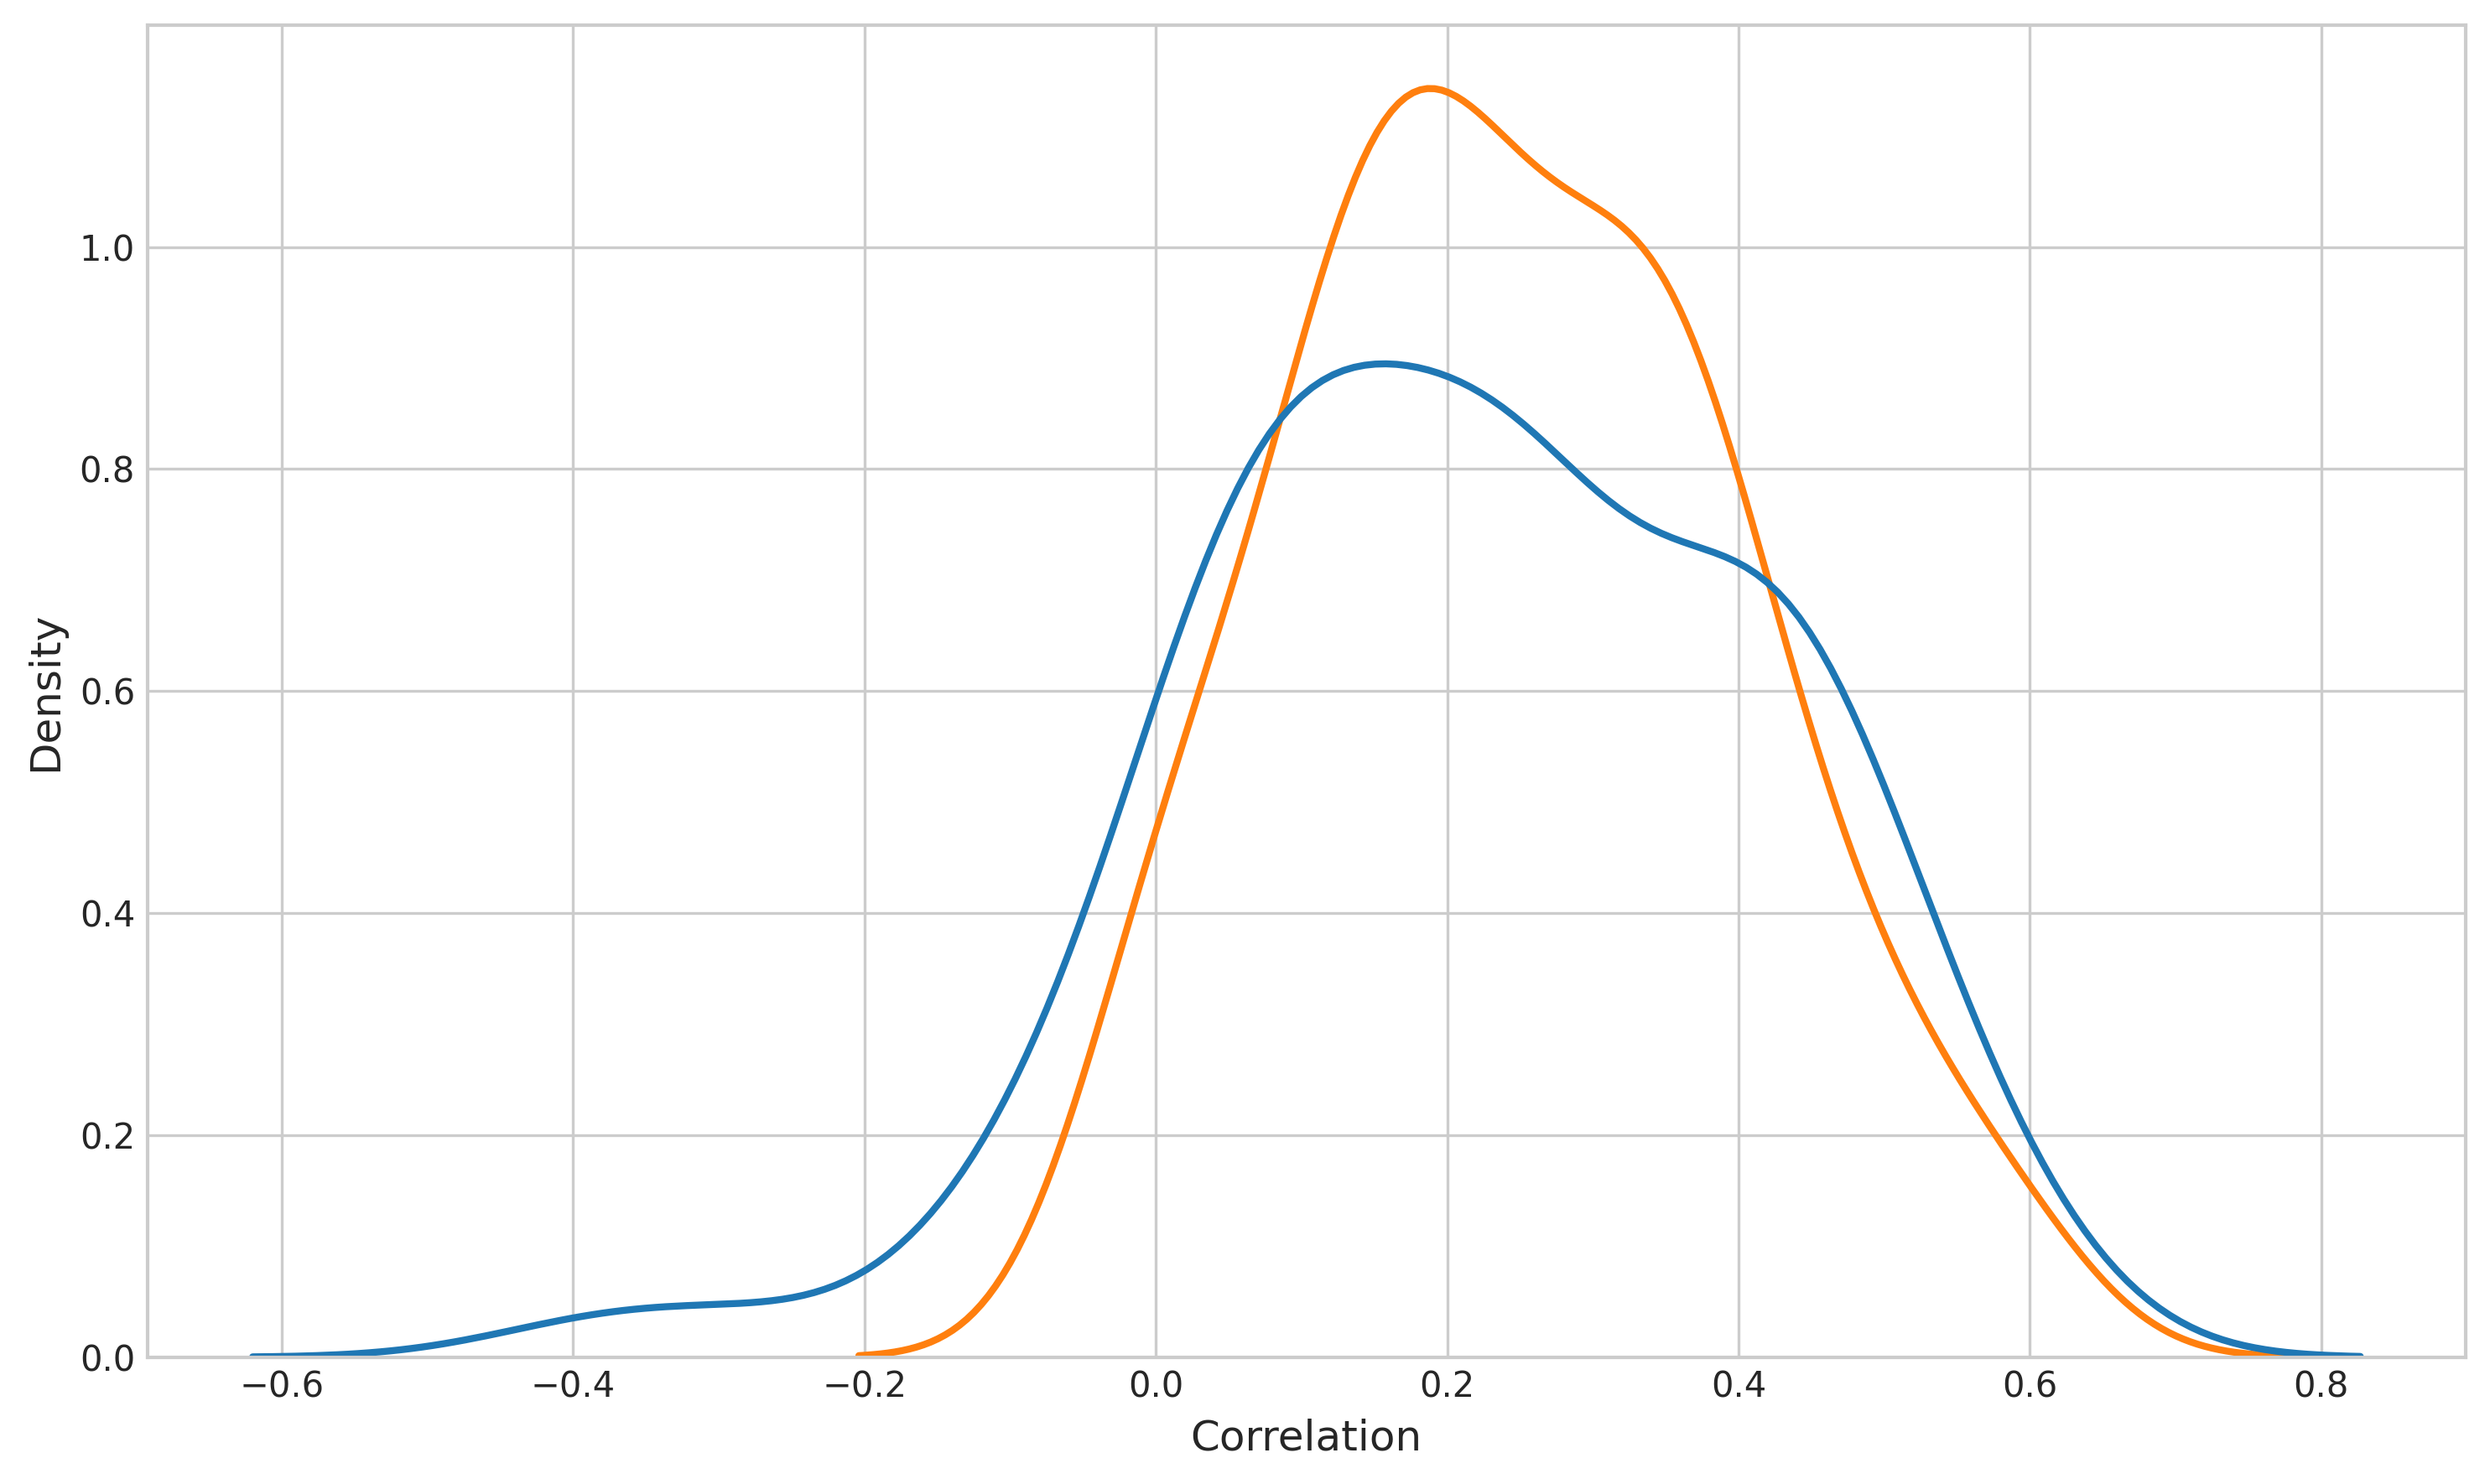

In [85]:
cols = ['scGPT_human_embeddings_similarities', 'GF-20L95M_HUMANemb_similarities', 'Correlation']

for c in cols:
    plot_kernel_density(psm20_labeled, column = c, output = f'/home/ubuntu/psm20_{c}_kde.png')

label = 0, random
0.037162072770297525
label = 1, complex
0.17036450629432995


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


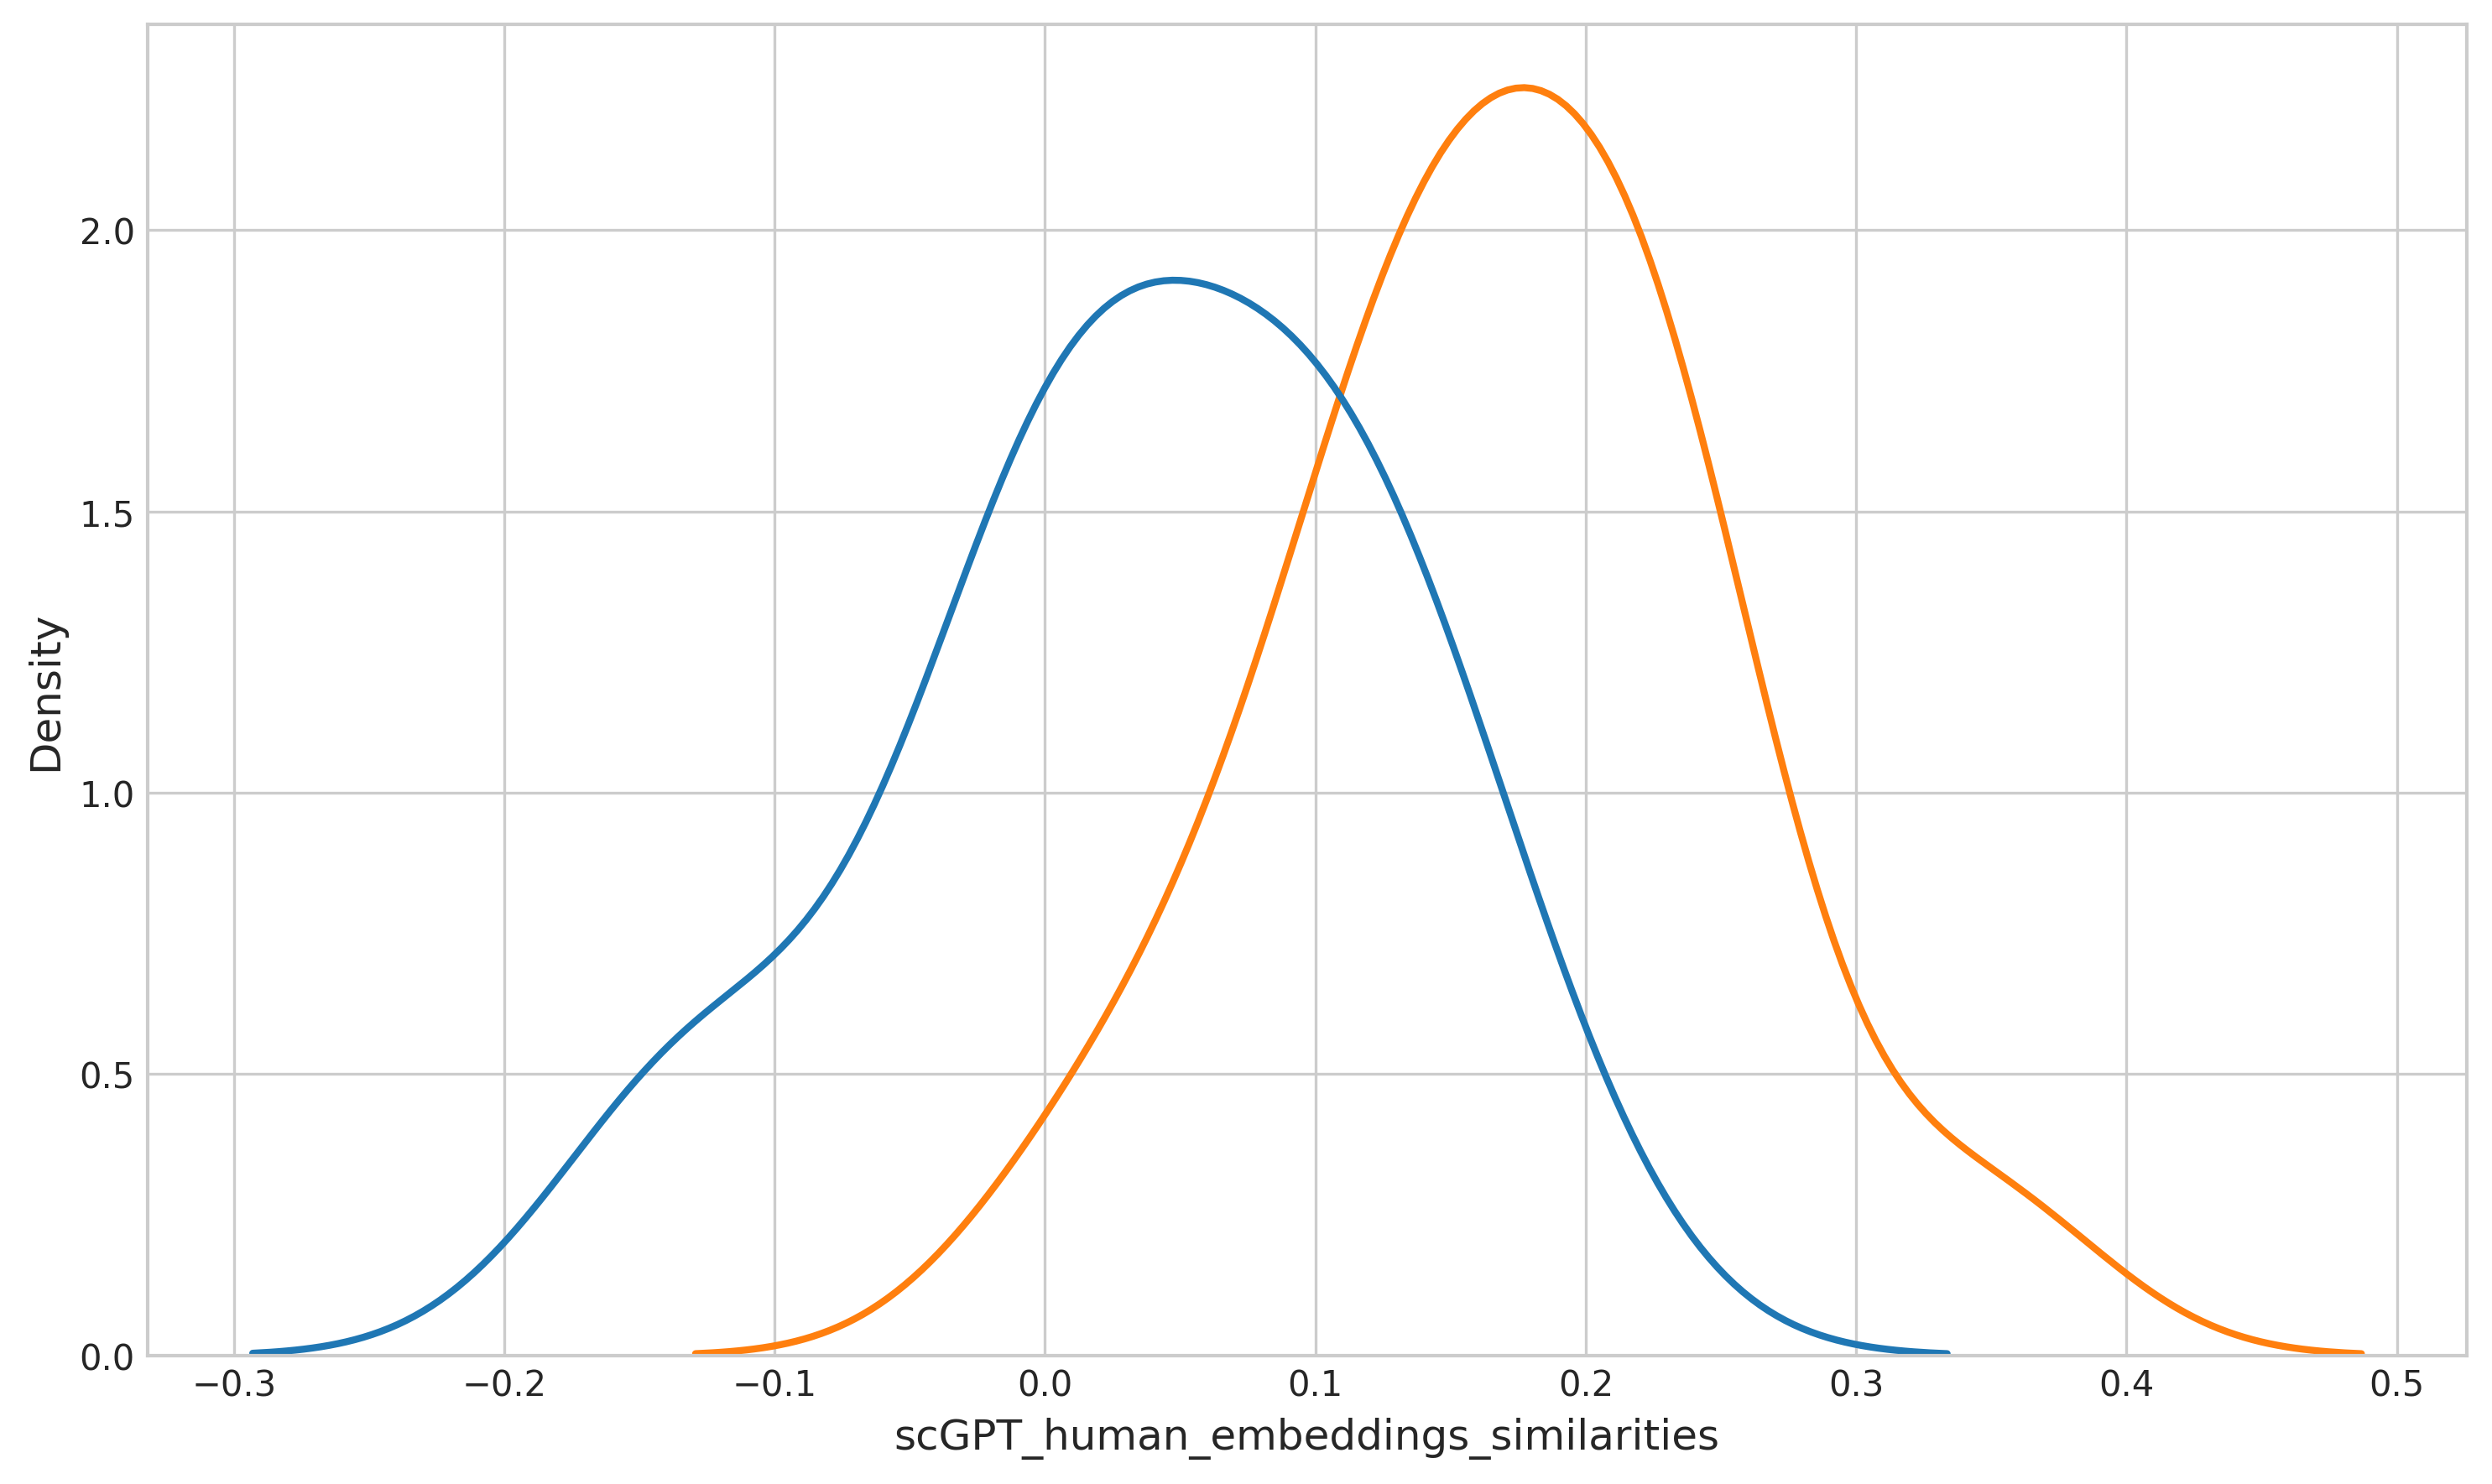

label = 0, random
0.15550209283828736
label = 1, complex
0.18302770107984542


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


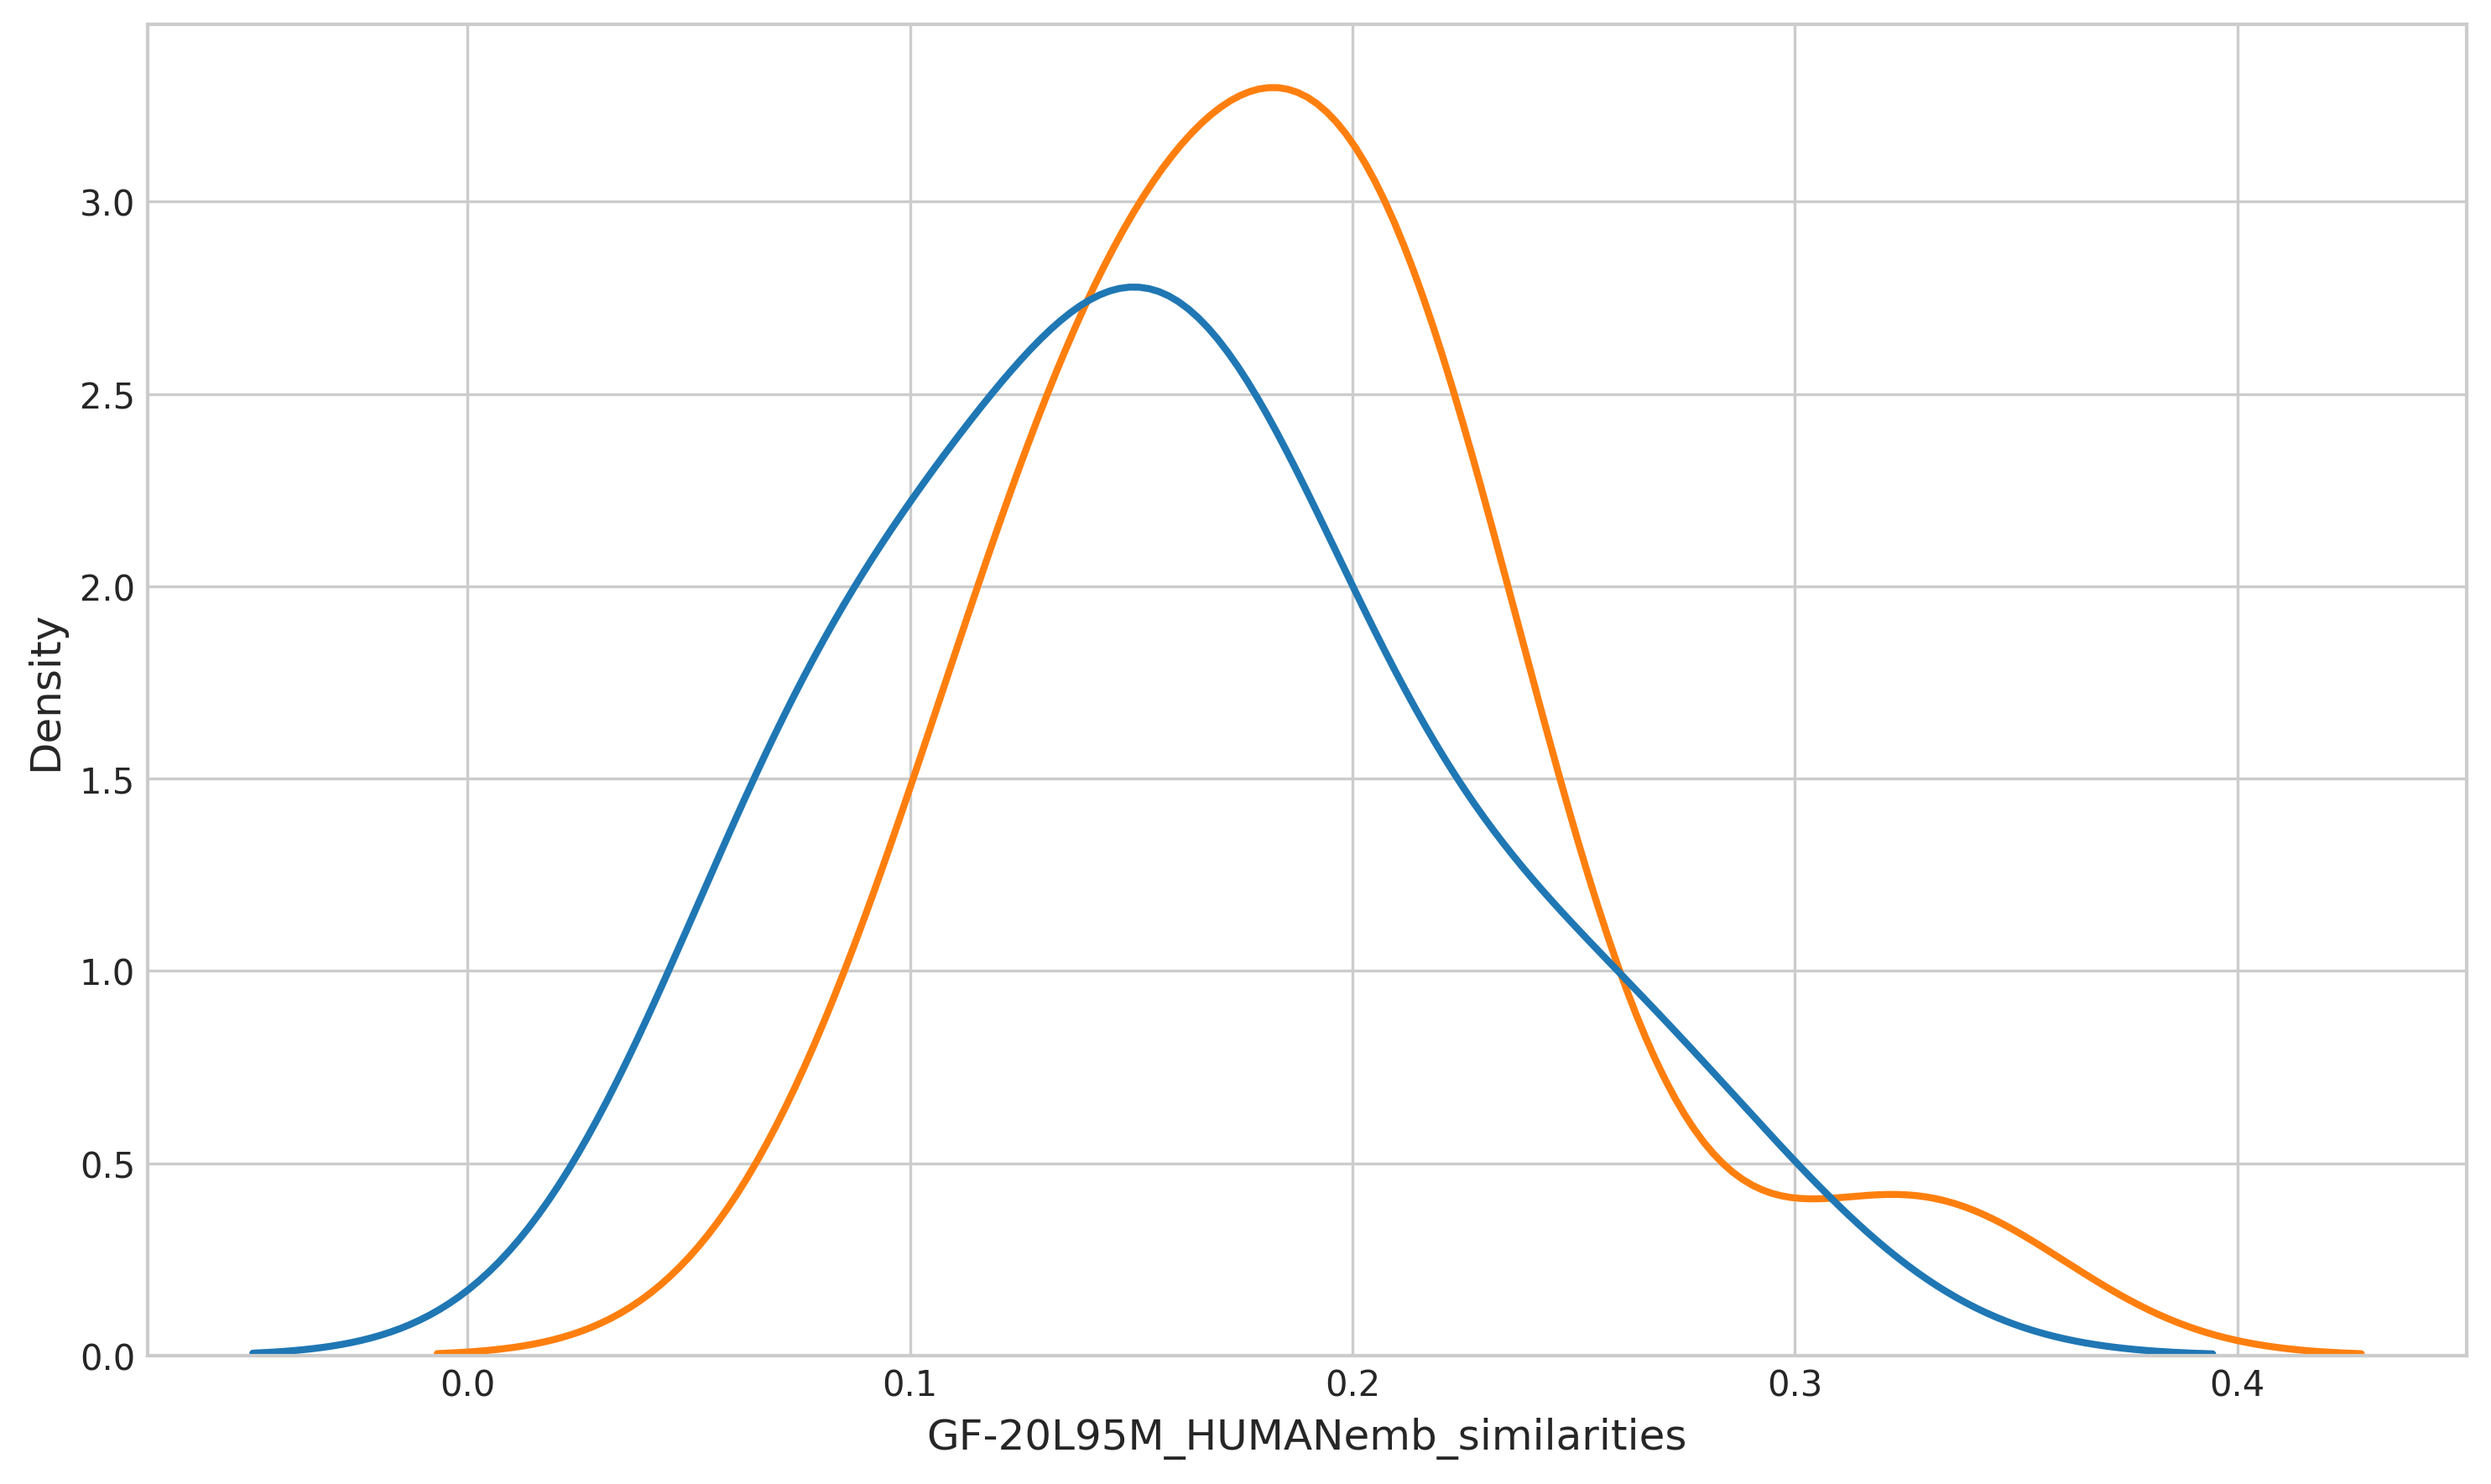

label = 0, random
0.16152970075172027
label = 1, complex
0.3157475510075441


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


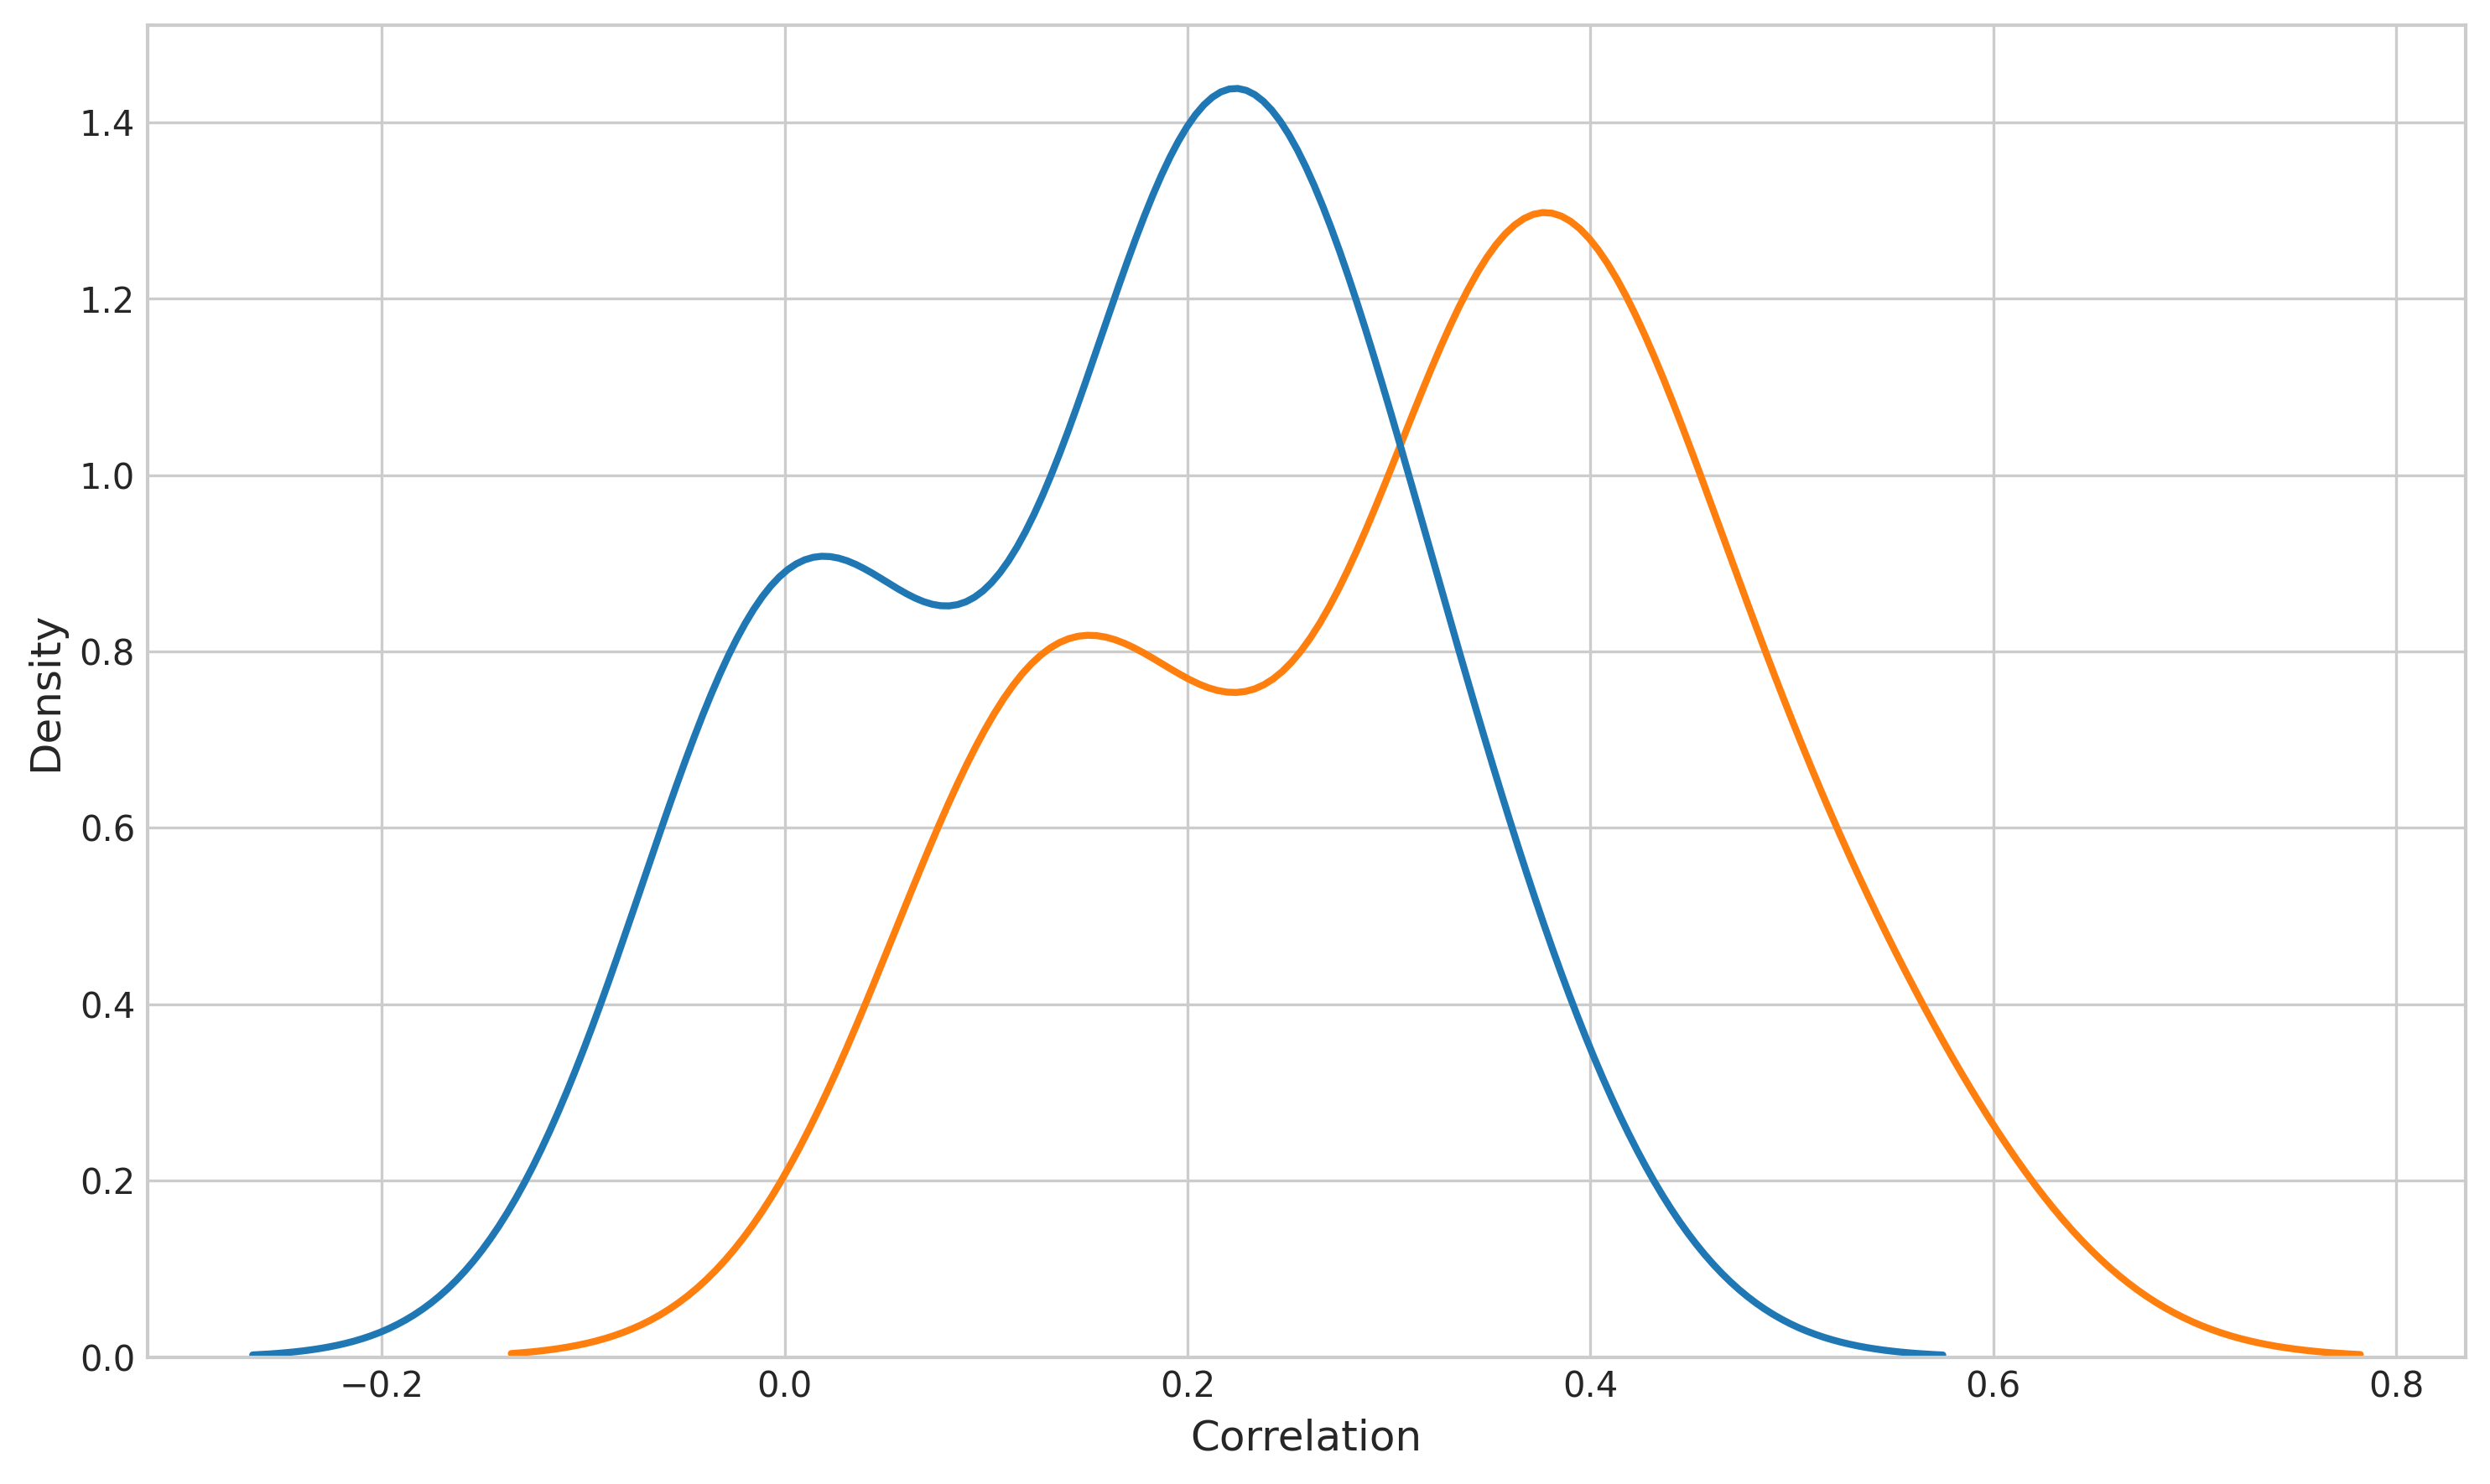

In [86]:
cols = ['scGPT_human_embeddings_similarities', 'GF-20L95M_HUMANemb_similarities', 'Correlation']

for c in cols:
    plot_kernel_density(IFTA_labeled, column = c, output = f'/home/ubuntu/IFTA_{c}_kde.png')

label = 0, random
0.057031194256110626
label = 1, complex
0.1842623299100634


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


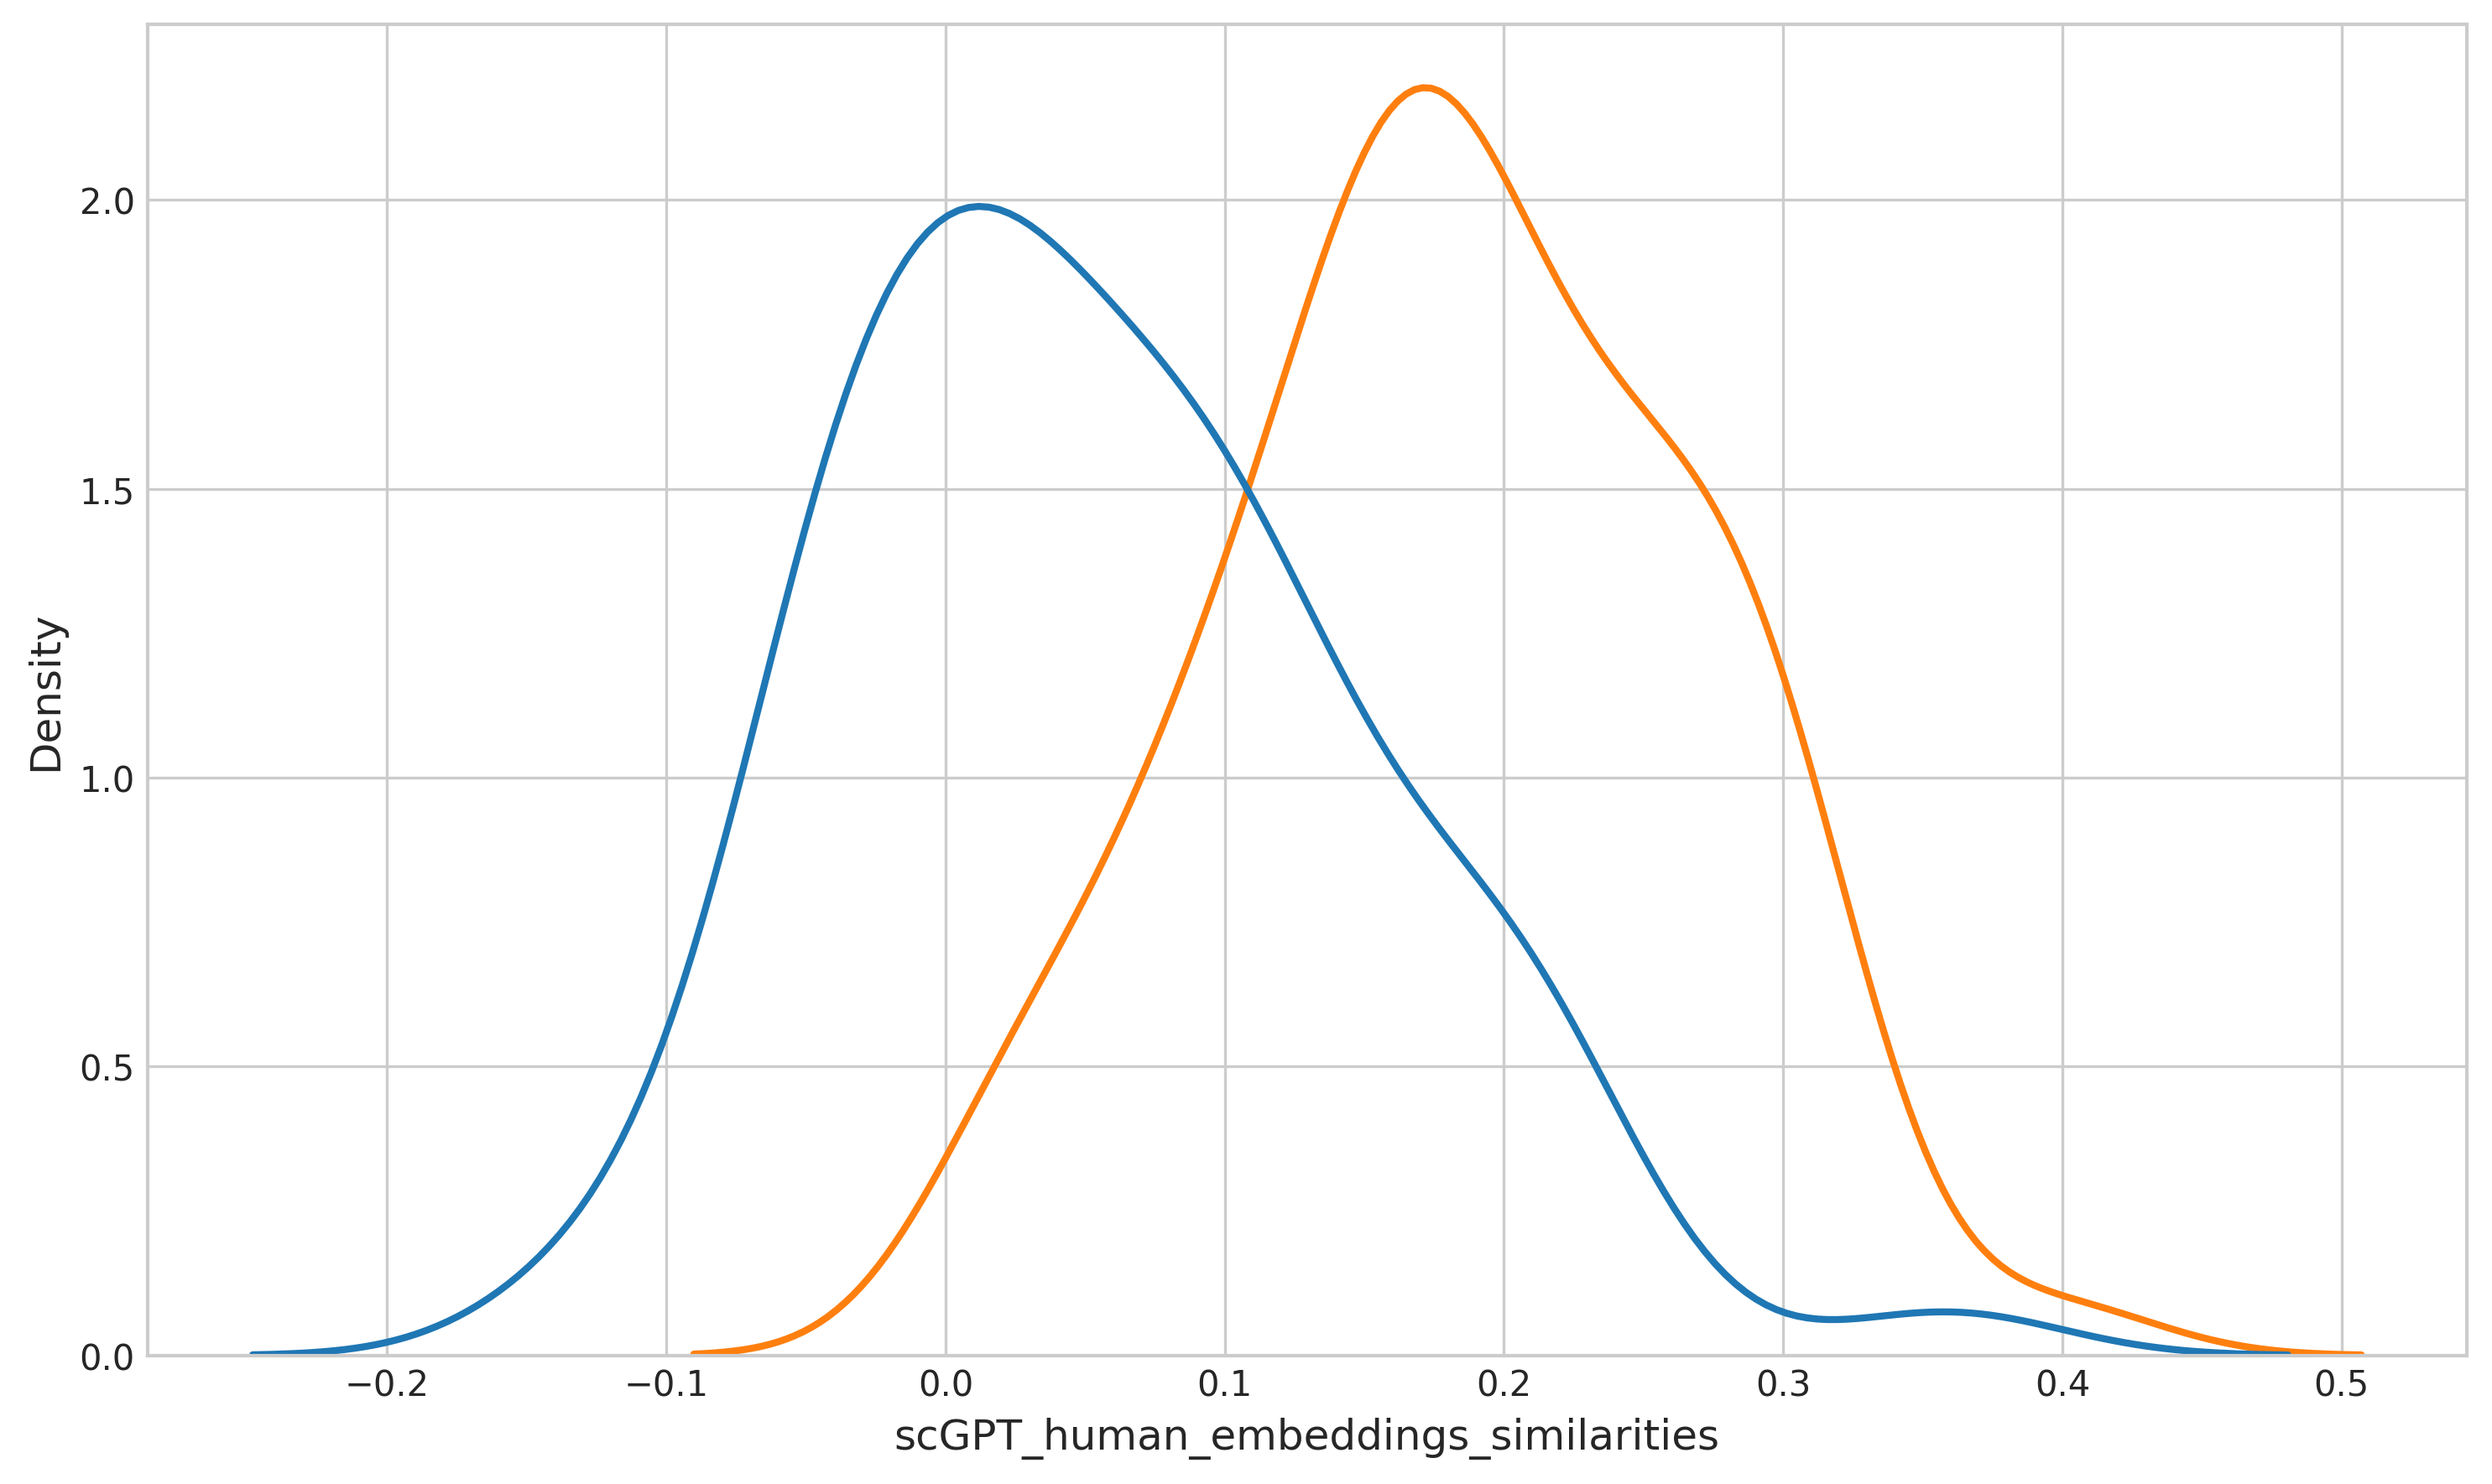

label = 0, random
0.1656234021101034
label = 1, complex
0.1696155545386401


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


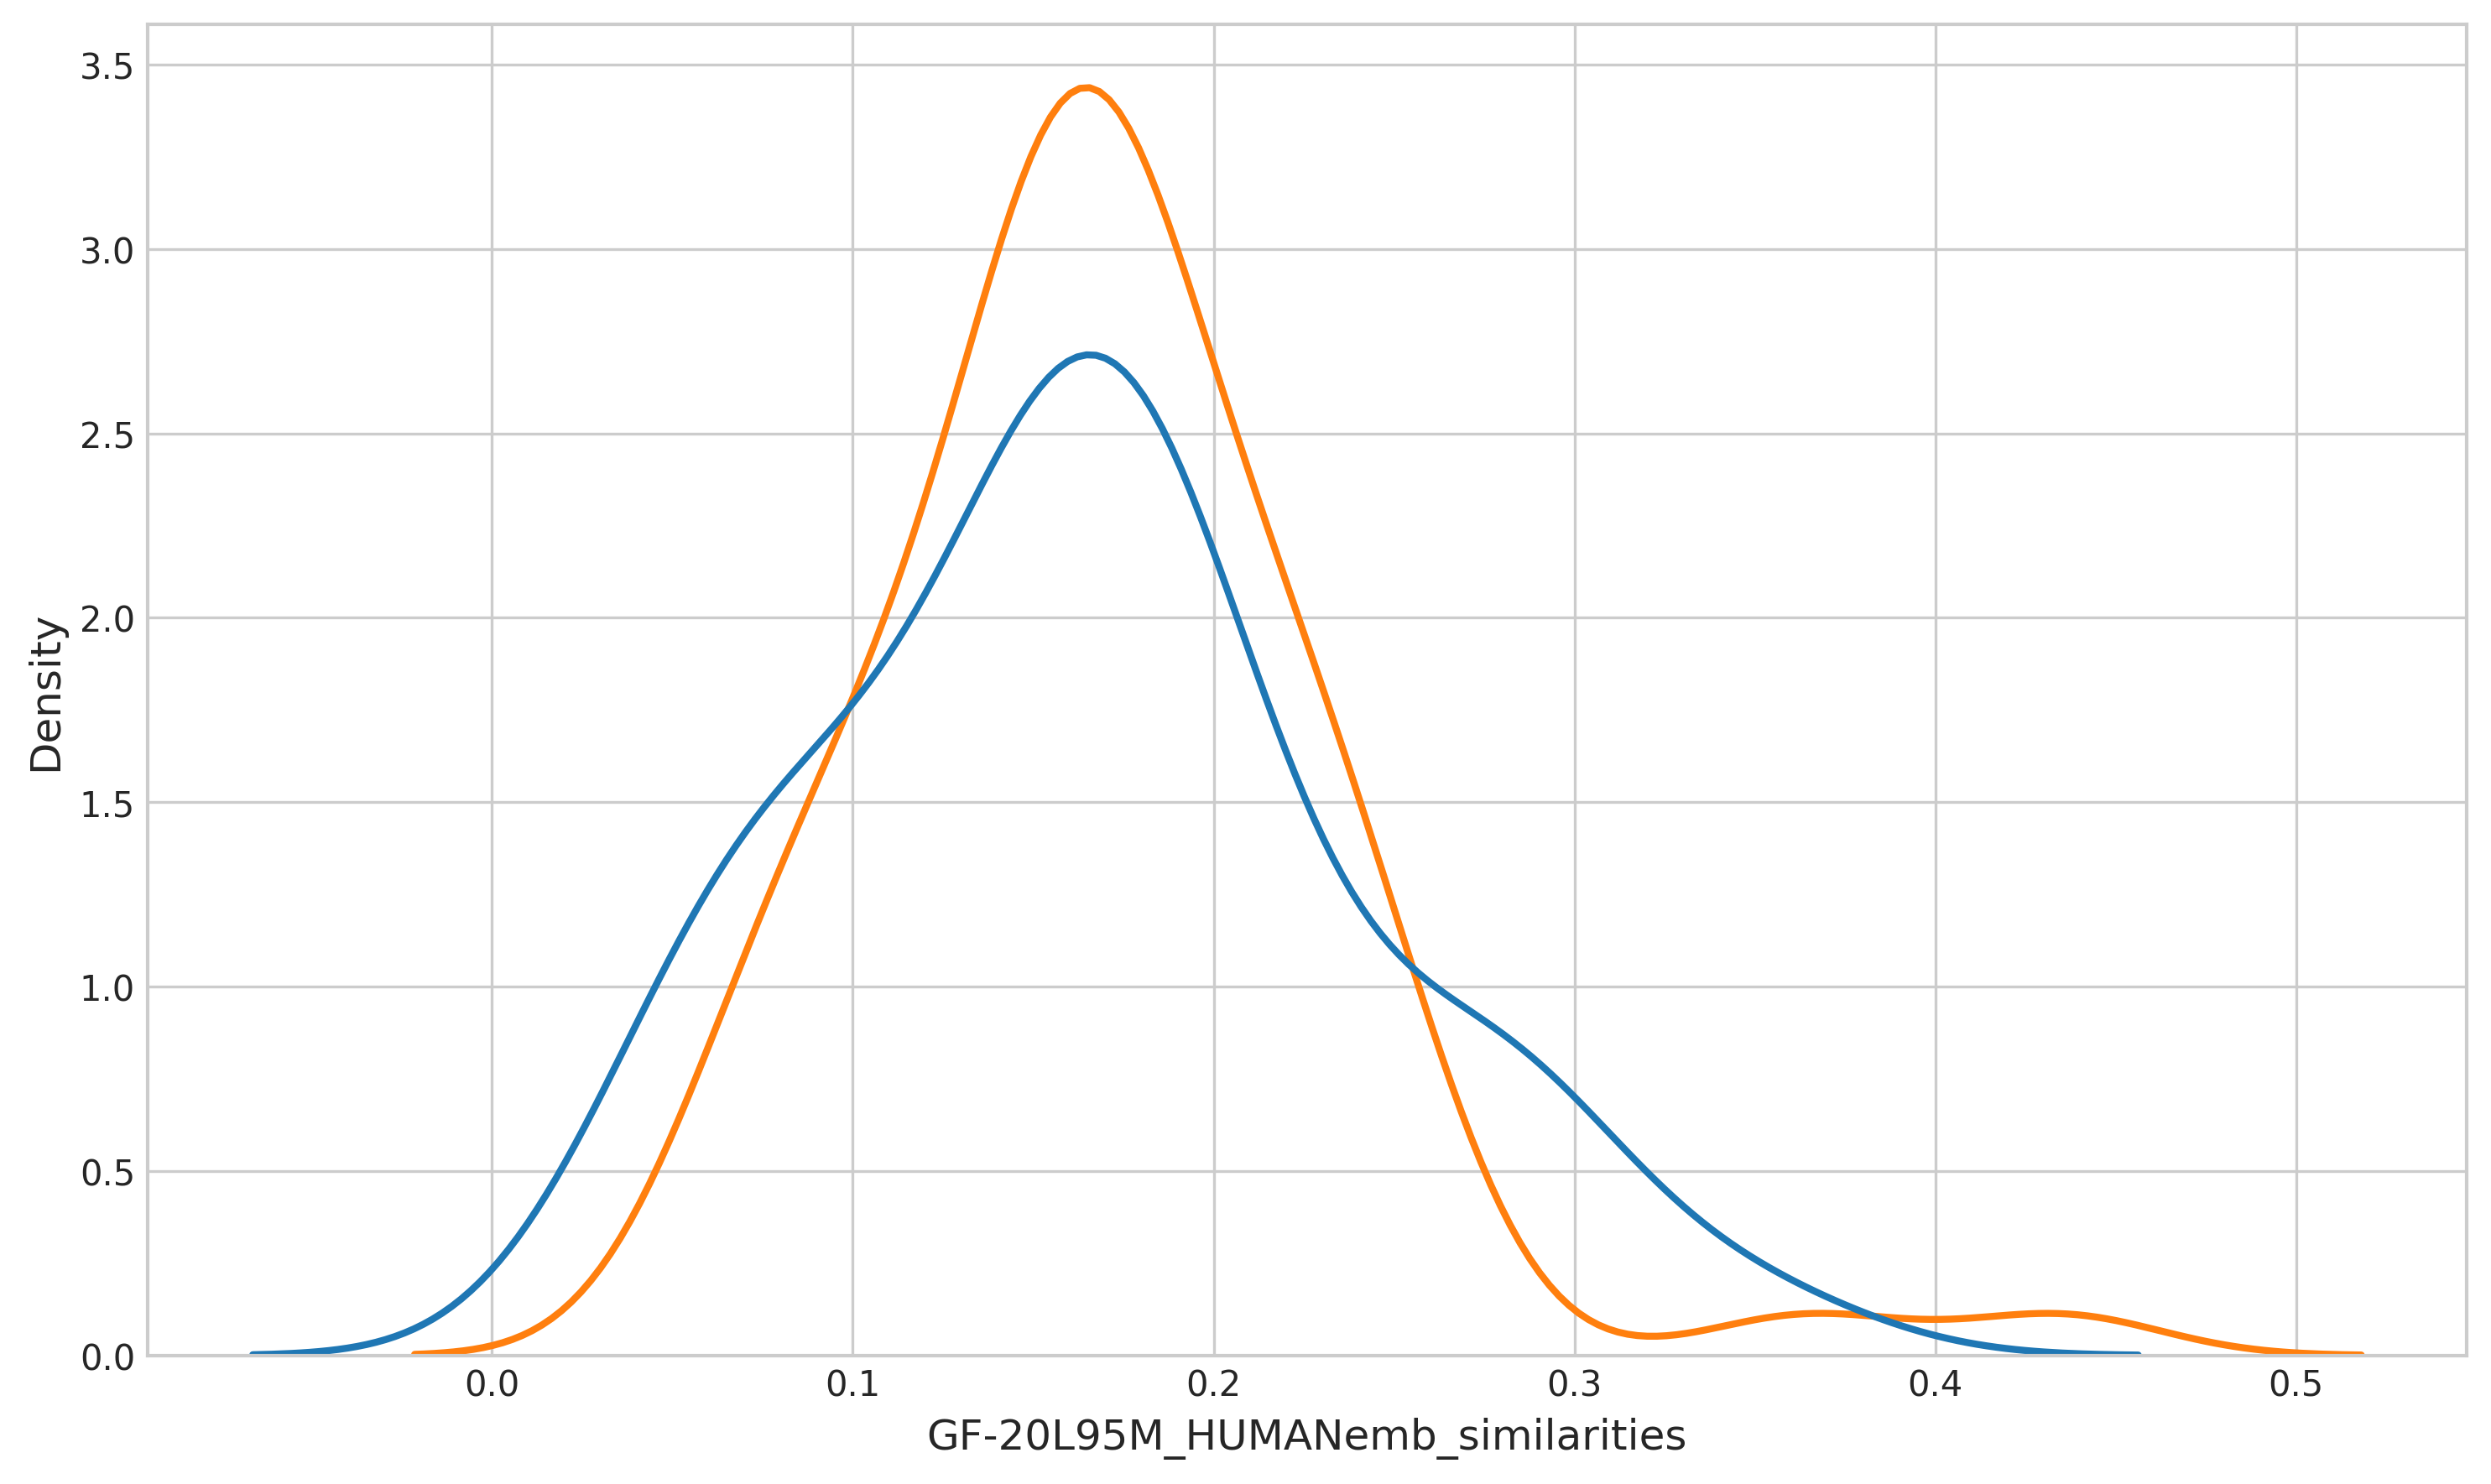

label = 0, random
0.31119364797172394
label = 1, complex
0.2658779231982666


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


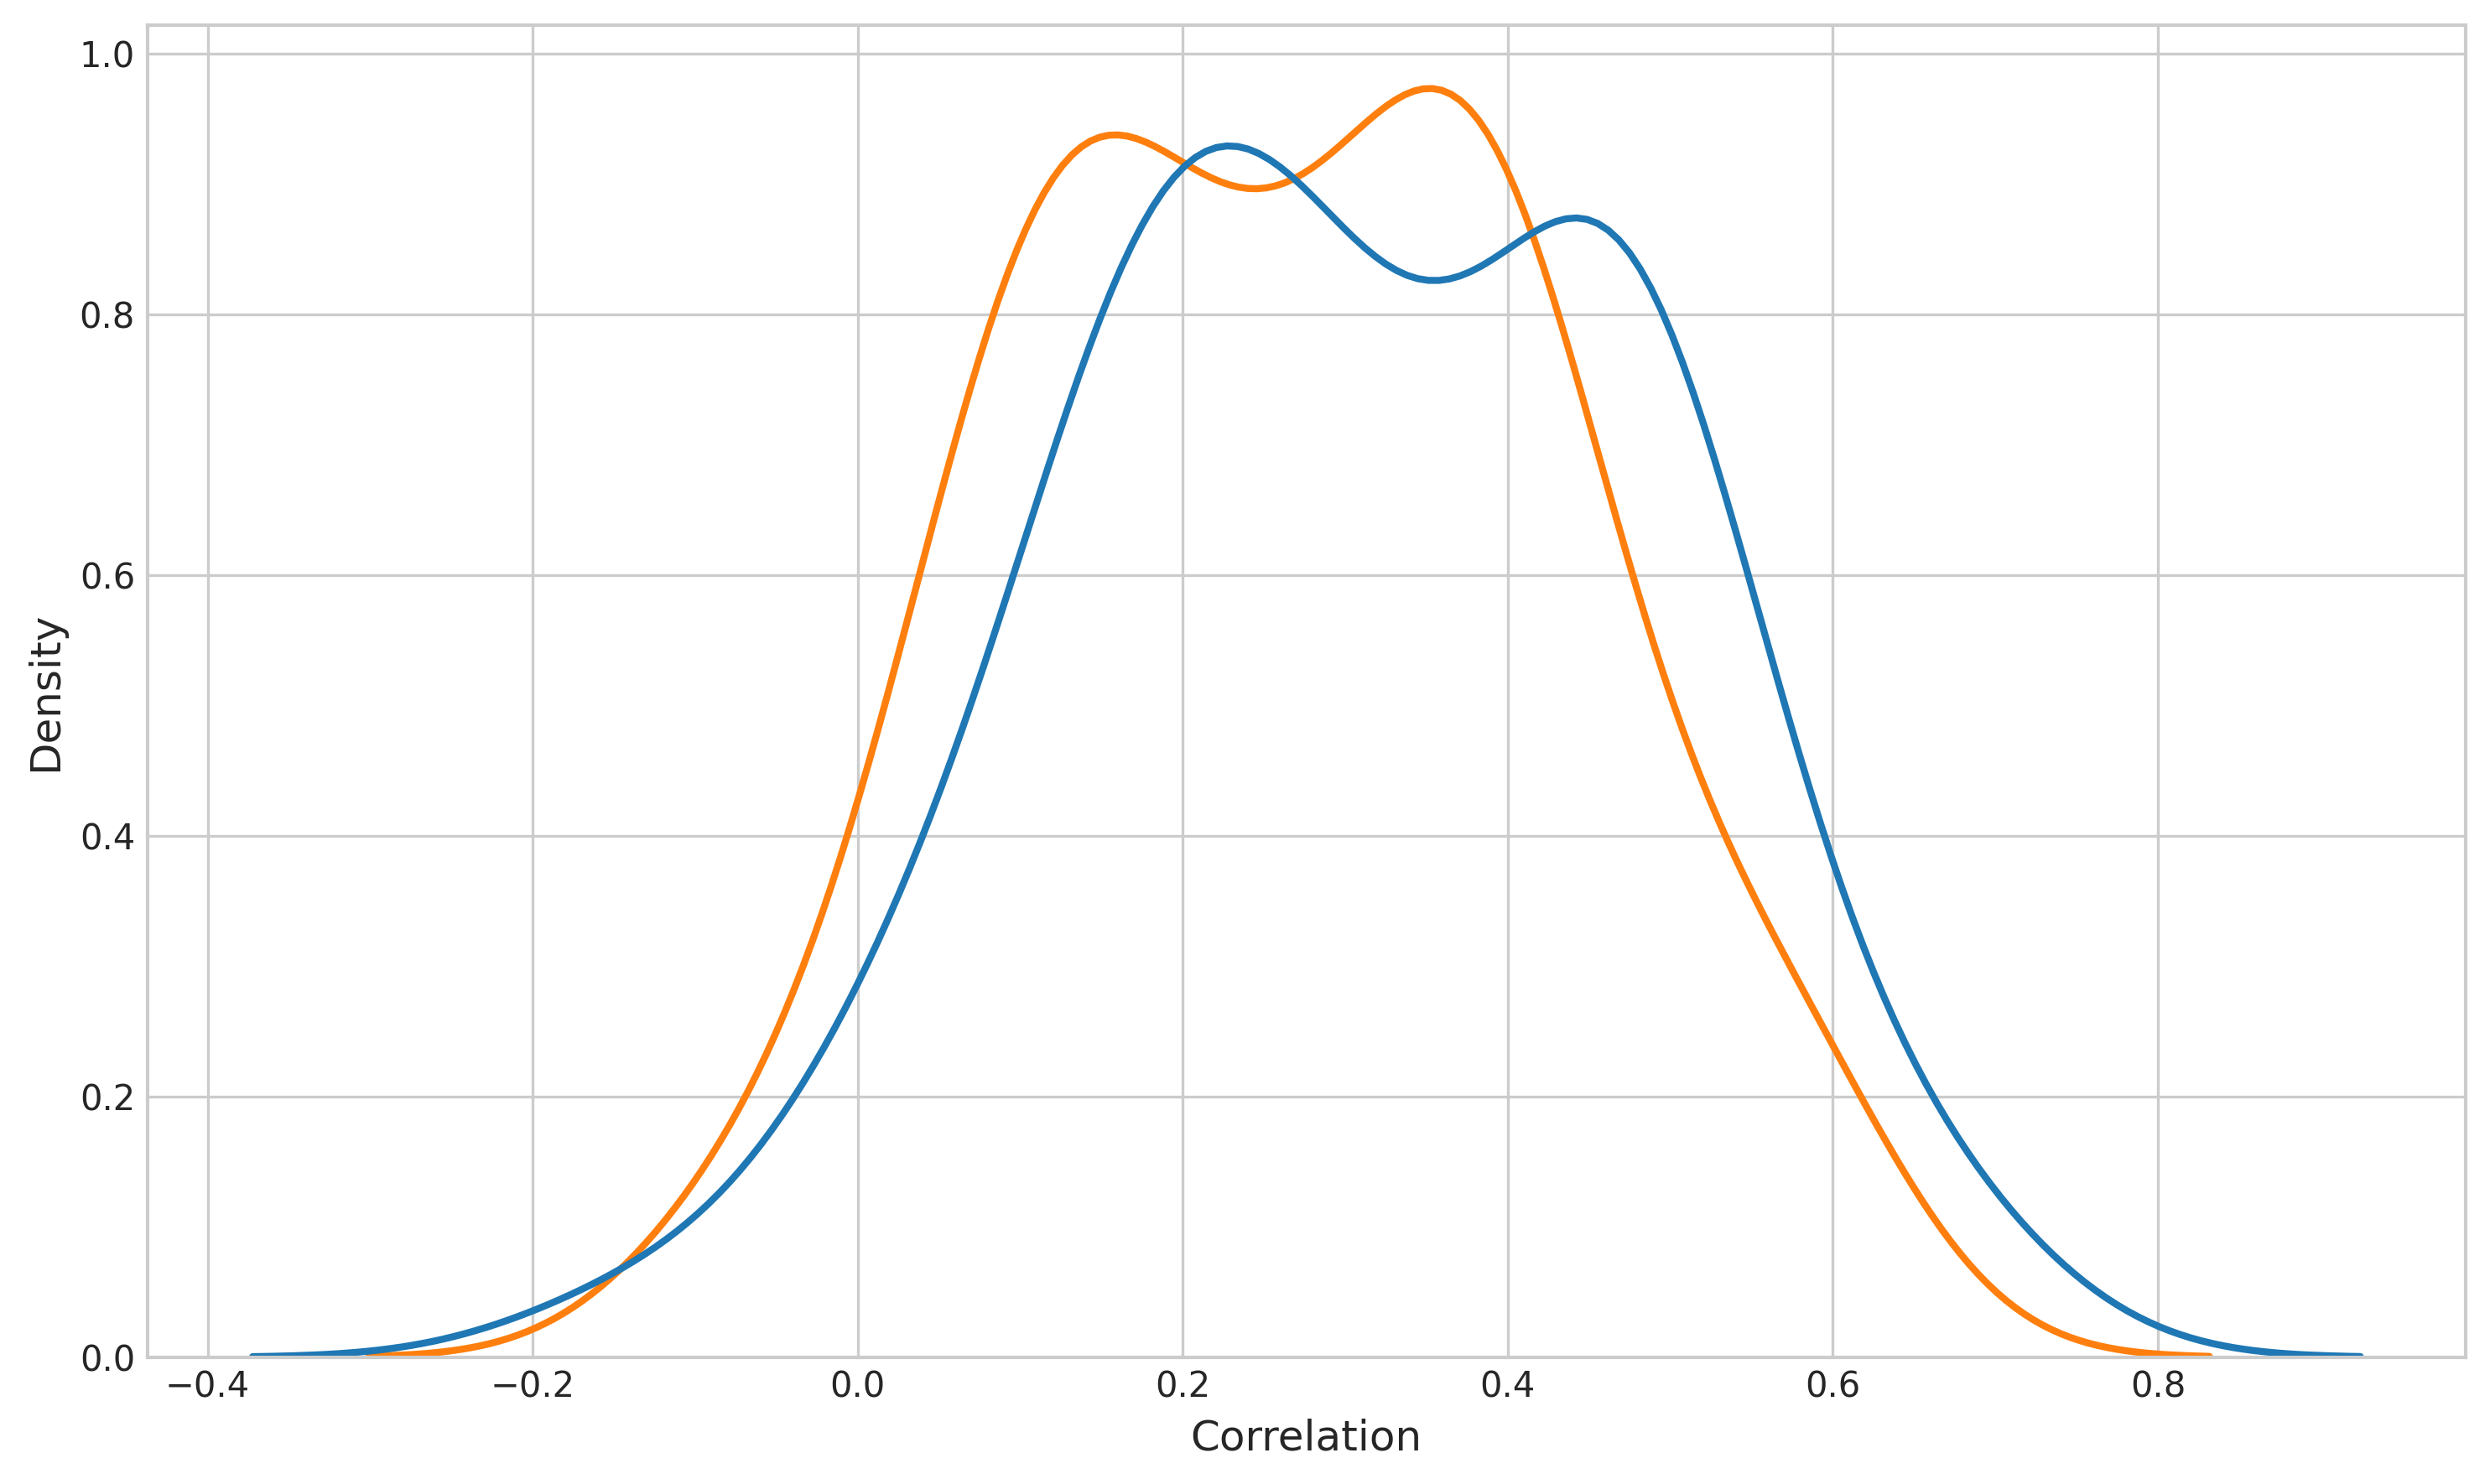

In [87]:
cols = ['scGPT_human_embeddings_similarities', 'GF-20L95M_HUMANemb_similarities', 'Correlation']

for c in cols:
    plot_kernel_density(IFTB_labeled, column = c, output = f'/home/ubuntu/IFTB_{c}_kde.png')

label = 0, random
0.18083676734714063
label = 1, complex
0.12589360489049456


/tmp/ipykernel_5032/3265089499.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


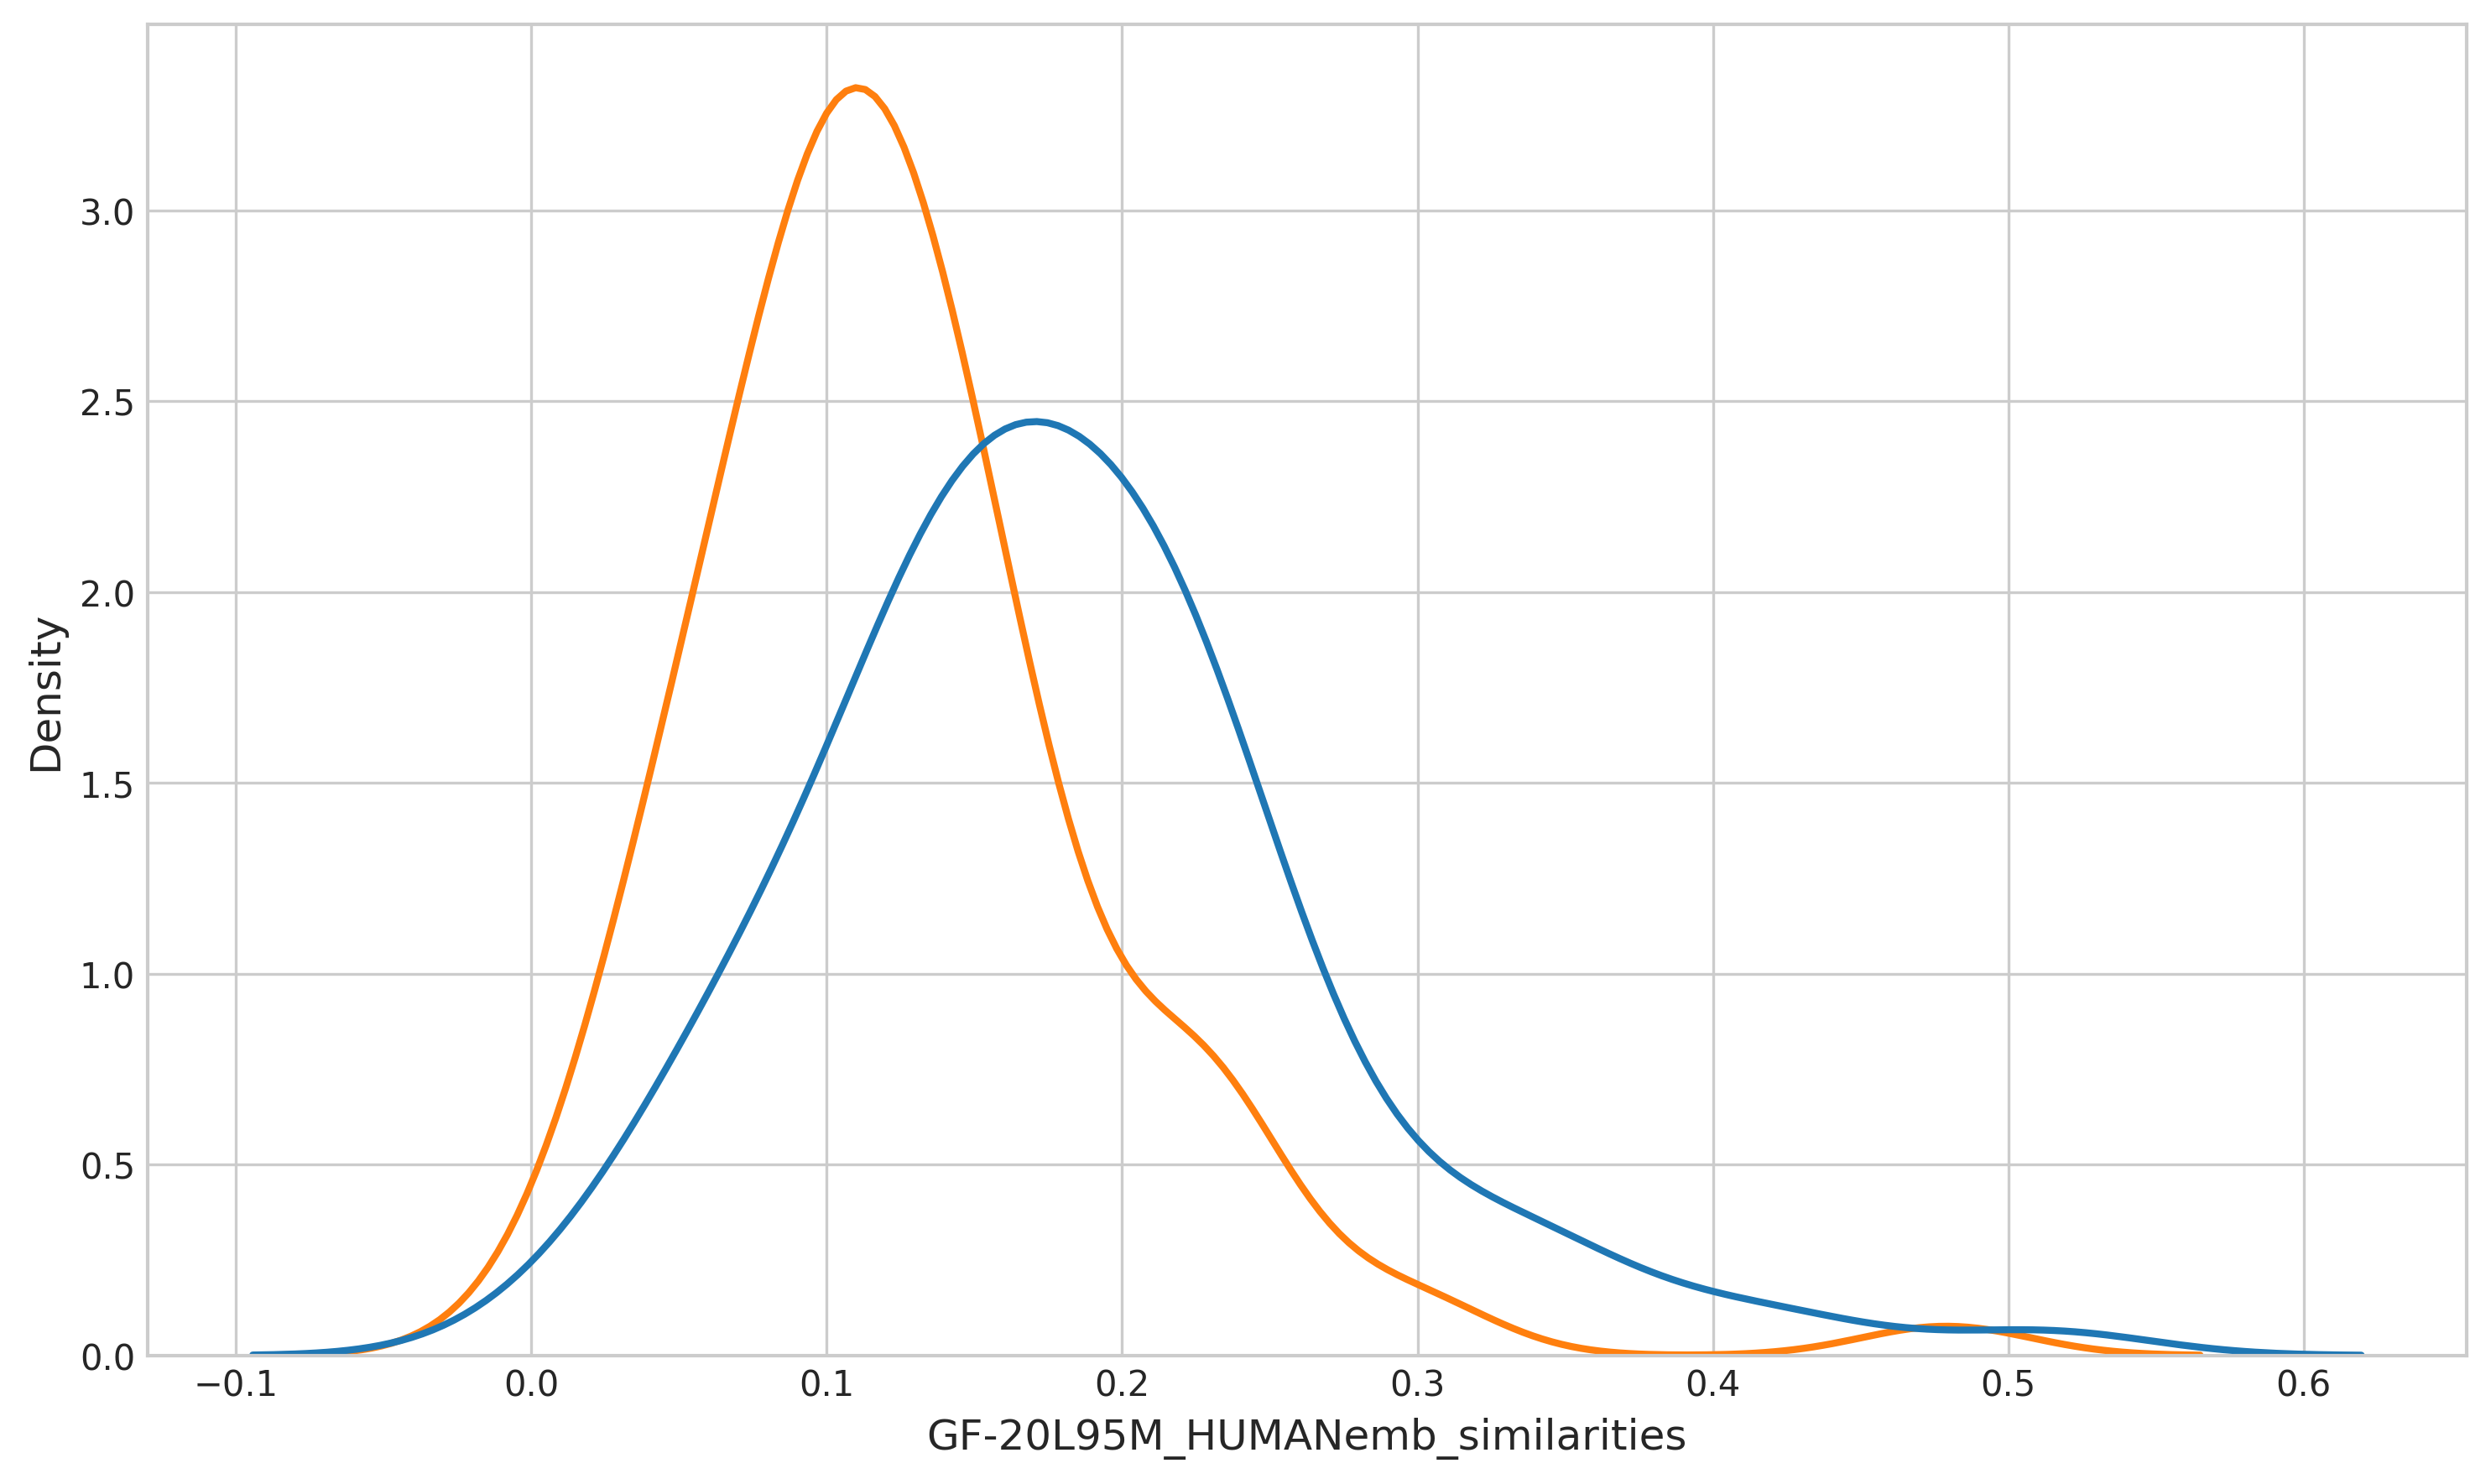

In [88]:
plot_kernel_density(psm20_labeled, column='GF-20L95M_HUMANemb_similarities', output='/home/ubuntu/psm20_scgpt_kde.png', title = 'Kernel Density Plot: Proteasome20', labels = ['PSM20', 'Background Distribution'])

label = 0, random
0.22238973278508137
label = 1, complex
0.24726198430404894


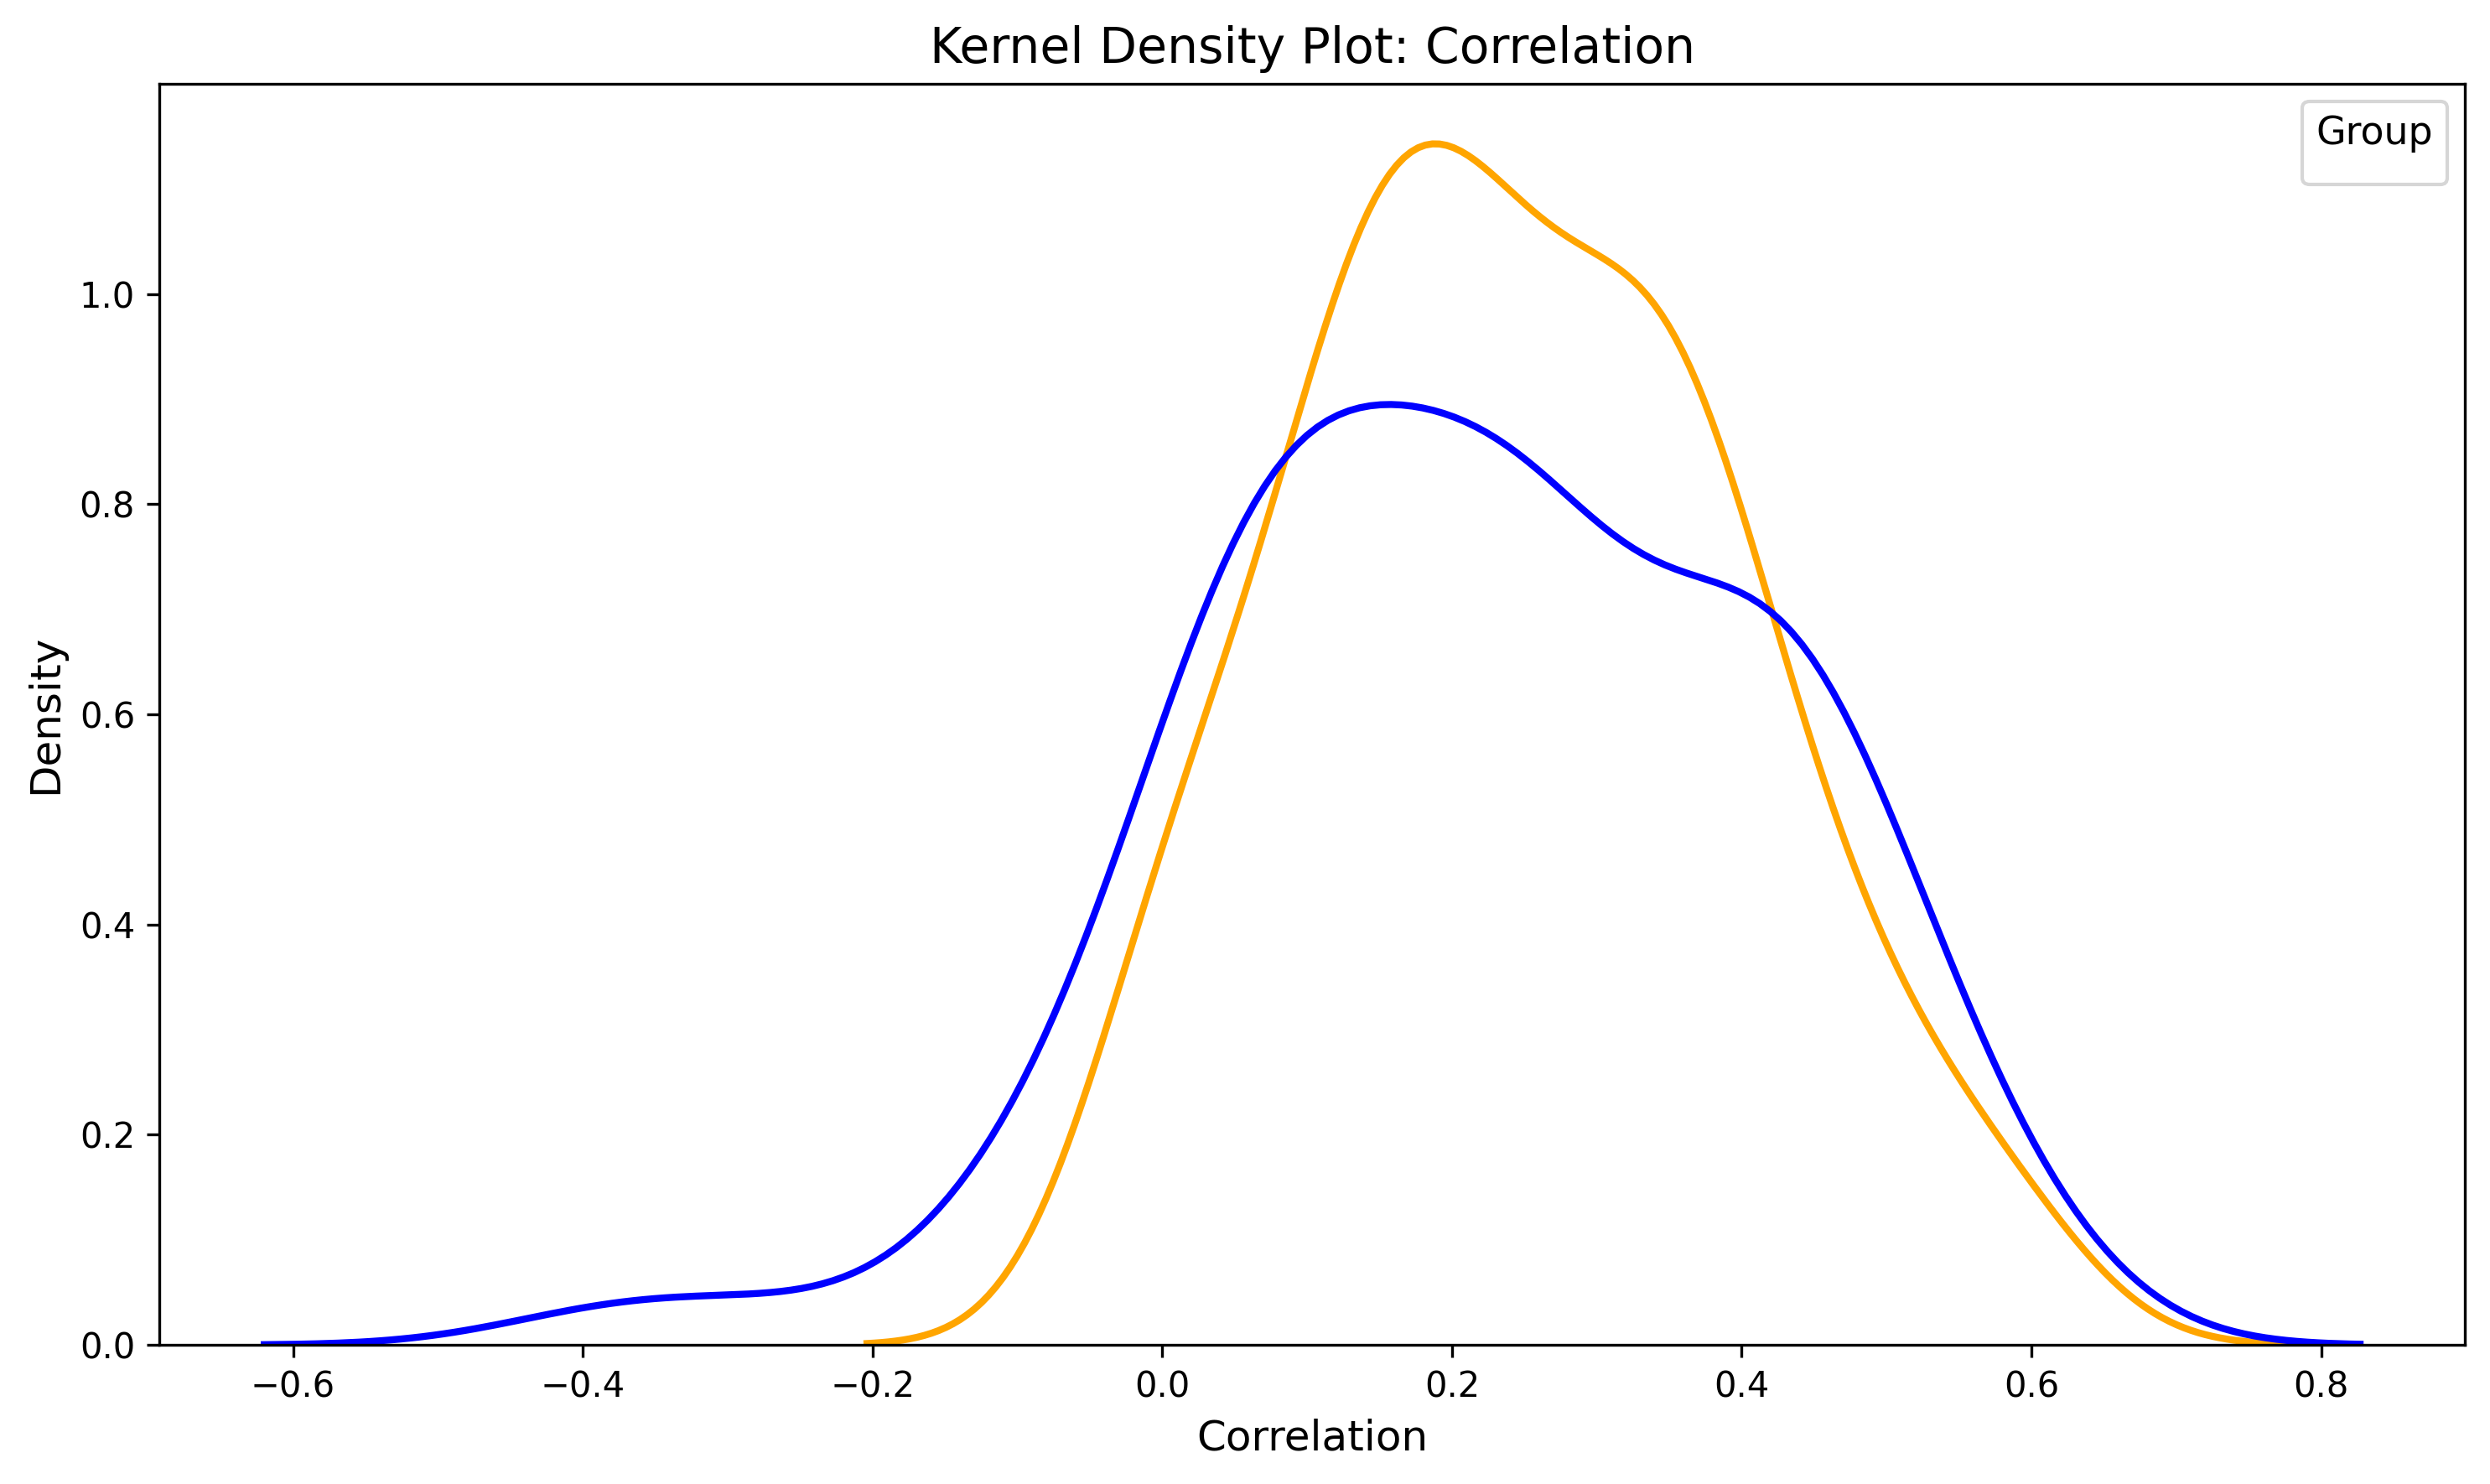

In [62]:
plot_kernel_density(psm20_labeled, column='Correlation', output='/home/ubuntu/psm20_scgpt_kde.png', title = 'Kernel Density Plot: Proteasome20', labels = ['PSM20', 'Background Distribution'])